# Employee Attrition

In [2]:
# =======================================================
# Importing Libraries
# =======================================================

# Core Libraries
import warnings
import time
import math
import shap
from datetime import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  # Set a popular chart style

# Pre-processing & Feature Selection
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Modeling
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier

# Pipeline and Imbalanced Data Handling
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Hyperparameter Tuning and Validation
from sklearn.model_selection import (
    GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
)

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_auc_score, roc_curve, RocCurveDisplay, make_scorer
)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("All modules loaded")

# =======================================================
# Data Loading and Duplicate Removal Example
# =======================================================

# Example: Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# Remove duplicate rows (if any) based on all columns
# Keep the first occurrence, drop subsequent duplicates
# df.drop_duplicates(inplace=True)

# (Optional) Confirm the shape after dropping duplicates
# print("Shape after removing duplicates:", df.shape)

All modules loaded


In [3]:
# Define the file path
file_path = "data/Employee_Attrition.csv"

# Try reading the file with low_memory=False to avoid DtypeWarning
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows to inspect the data
df.head()

Age              Attrition BusinessTravel  DailyRate Department  \
0  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
1  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
2  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
3  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
4  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   

  DistanceFromHome  Education EducationField EmployeeCount EmployeeNumber  \
0                1        2.0  Life Sciences             1              1   
1                1        2.0  Life Sciences             1              1   
2                1        2.0  Life Sciences             1              7   
3                1        2.0  Life Sciences             1              8   
4                1        2.0  Life Sciences             1              9   

   ... StandardHours  StockOptionLevel TotalWorkingYears  \
0  ...          80.0               0.0               8.0   
1  ...          80.0               0.0               8.0   
2  ...          80.0               0.0               8.0   
3  ...          80.0               0.0               8.0   
4  ...          80.0               0.0               8.0   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                   0.0              1.0             6.0                4.0   
1                   0.0              1.0             6.0                4.0   
2                   0.0              1.0             6.0                4.0   
3                   0.0              1.0             6.0                4.0   
4                   0.0              1.0             6.0                4.0   

  YearsSinceLastPromotion YearsWithCurrManager Employee Source  
0                     0.0                  5.0        Referral  
1                     0.0                  5.0        Referral  
2                     0.0                  5.0        Referral  
3                     0.0                  5.0        Referral  
4                     0.0                  5.0        Referral  

[5 rows x 37 columns]

In [4]:
df.describe().T

count          mean          std     min     25%  \
Age                       23433.0     36.936671     9.137432    18.0    30.0   
DailyRate                 23424.0    801.828765   403.206166   102.0   465.0   
Education                 23424.0      2.910050     1.024931     1.0     2.0   
EnvironmentSatisfaction   23427.0     13.681777  1186.544372     1.0     2.0   
JobInvolvement            23427.0      2.733811     0.836860     1.0     2.0   
JobLevel                  23429.0      2.064023     1.105421     1.0     1.0   
MonthlyRate               23425.0  14304.343821  7102.636293  2094.0  8053.0   
NumCompaniesWorked        23427.0      3.887779   155.332904     0.0     1.0   
PerformanceRating         23426.0      3.155852     0.371215     3.0     3.0   
RelationshipSatisfaction  23428.0      2.713334     1.080030     1.0     2.0   
StandardHours             23426.0     79.993469     0.706850     3.0    80.0   
StockOptionLevel          23427.0      0.799846     1.122454     0.0     0.0   
TotalWorkingYears         23428.0     11.259220     7.772370     0.0     6.0   
TrainingTimesLastYear     23425.0      2.800171     1.308527     0.0     2.0   
WorkLifeBalance           23426.0      2.761803     0.705788     1.0     2.0   
YearsAtCompany            23423.0      7.010887     6.138394     0.0     3.0   
YearsInCurrentRole        23421.0      4.227445     3.627284     0.0     2.0   
YearsSinceLastPromotion   23425.0      2.183821     3.218615     0.0     0.0   
YearsWithCurrManager      23429.0      4.127577     3.572379     0.0     2.0   

                              50%      75%       max  
Age                          36.0     43.0      60.0  
DailyRate                   802.0   1157.0    1499.0  
Education                     3.0      4.0       6.0  
EnvironmentSatisfaction       3.0      4.0  129588.0  
JobInvolvement                3.0      3.0      54.0  
JobLevel                      2.0      3.0       5.0  
MonthlyRate               14222.0  20460.0   26999.0  
NumCompaniesWorked            2.0      4.0   23258.0  
PerformanceRating             3.0      3.0      13.0  
RelationshipSatisfaction      3.0      4.0       4.0  
StandardHours                80.0     80.0      80.0  
StockOptionLevel              1.0      1.0      80.0  
TotalWorkingYears            10.0     15.0      40.0  
TrainingTimesLastYear         3.0      3.0      30.0  
WorkLifeBalance               3.0      3.0       4.0  
YearsAtCompany                5.0     10.0      40.0  
YearsInCurrentRole            3.0      7.0      22.0  
YearsSinceLastPromotion       1.0      3.0      17.0  
YearsWithCurrManager          3.0      7.0      17.0

In [5]:
df.shape

(23436, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [7]:
# Replace '.' with '_' in column names
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.Attrition.value_counts(normalize=True).round(3)

Attrition
Current employee         0.842
Voluntary Resignation    0.158
Name: proportion, dtype: float64

In [9]:
# Check for duplicates
df.duplicated().sum()

14

In [10]:
# Drop duplicate records
df = df.drop_duplicates()

In [11]:
#Check for missing values
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
ApplicationID                3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [12]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [13]:
# 'unknown' values per categorical column
unknown_summary = {
    col: ((df_cleaned[col] == 'unknown').sum()) for col in df.select_dtypes(include=['object']).columns
}

unknown_summary

{'Attrition': 0,
 'BusinessTravel': 0,
 'Department': 0,
 'DistanceFromHome': 0,
 'EducationField': 0,
 'EmployeeCount': 0,
 'EmployeeNumber': 0,
 'ApplicationID': 0,
 'Gender': 0,
 'HourlyRate': 0,
 'JobRole': 0,
 'JobSatisfaction': 0,
 'MaritalStatus': 0,
 'MonthlyIncome': 0,
 'Over18': 0,
 'OverTime': 0,
 'PercentSalaryHike': 0,
 'EmployeeSource': 0}

In [14]:
# Detect outliers using IQR method
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df

Outlier Count
Age                                   0
DailyRate                             0
Education                             0
EnvironmentSatisfaction               0
JobInvolvement                        0
JobLevel                              0
MonthlyRate                           0
NumCompaniesWorked                  810
PerformanceRating                  3600
RelationshipSatisfaction              0
StandardHours                         0
StockOptionLevel                   1326
TotalWorkingYears                   988
TrainingTimesLastYear              3751
WorkLifeBalance                       0
YearsAtCompany                     1042
YearsInCurrentRole                  338
YearsSinceLastPromotion            1675
YearsWithCurrManager                221

In [15]:
df_cleaned.shape

(23190, 37)

In [16]:
df_cleaned.describe()

Age     DailyRate     Education  EnvironmentSatisfaction  \
count  23190.000000  23190.000000  23190.000000             23190.000000   
mean      36.922941    802.246313      2.908754                 2.719879   
std        9.116307    403.207375      1.024915                 1.094924   
min       18.000000    102.000000      1.000000                 1.000000   
25%       30.000000    465.000000      2.000000                 2.000000   
50%       36.000000    802.000000      3.000000                 3.000000   
75%       43.000000   1157.000000      4.000000                 4.000000   
max       60.000000   1499.000000      5.000000                 4.000000   

       JobInvolvement      JobLevel   MonthlyRate  NumCompaniesWorked  \
count    23190.000000  23190.000000  23190.000000        23190.000000   
mean         2.730574      2.065373  14302.076757            2.688702   
std          0.710093      1.105947   7100.061799            2.498330   
min          1.000000      1.000000   2094.000000            0.000000   
25%          2.000000      1.000000   8053.000000            1.000000   
50%          3.000000      2.000000  14222.000000            2.000000   
75%          3.000000      3.000000  20460.000000            4.000000   
max          4.000000      5.000000  26999.000000            9.000000   

       PerformanceRating  RelationshipSatisfaction  StandardHours  \
count       23190.000000              23190.000000        23190.0   
mean            3.155239                  2.713497           80.0   
std             0.362140                  1.080735            0.0   
min             3.000000                  1.000000           80.0   
25%             3.000000                  2.000000           80.0   
50%             3.000000                  3.000000           80.0   
75%             3.000000                  4.000000           80.0   
max             4.000000                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count      23190.000000       23190.000000           23190.000000   
mean           0.794437          11.269211               2.798879   
std            0.850685           7.765751               1.289952   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count     23190.000000    23190.000000        23190.000000   
mean          2.761665        7.016947            4.230530   
std           0.705312        6.138112            3.626984   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count             23190.000000          23190.000000  
mean                  2.182191              4.130487  
std                   3.215755              3.571966  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000

In [17]:
df_cleaned.describe().T

count          mean          std     min     25%  \
Age                       23190.0     36.922941     9.116307    18.0    30.0   
DailyRate                 23190.0    802.246313   403.207375   102.0   465.0   
Education                 23190.0      2.908754     1.024915     1.0     2.0   
EnvironmentSatisfaction   23190.0      2.719879     1.094924     1.0     2.0   
JobInvolvement            23190.0      2.730574     0.710093     1.0     2.0   
JobLevel                  23190.0      2.065373     1.105947     1.0     1.0   
MonthlyRate               23190.0  14302.076757  7100.061799  2094.0  8053.0   
NumCompaniesWorked        23190.0      2.688702     2.498330     0.0     1.0   
PerformanceRating         23190.0      3.155239     0.362140     3.0     3.0   
RelationshipSatisfaction  23190.0      2.713497     1.080735     1.0     2.0   
StandardHours             23190.0     80.000000     0.000000    80.0    80.0   
StockOptionLevel          23190.0      0.794437     0.850685     0.0     0.0   
TotalWorkingYears         23190.0     11.269211     7.765751     0.0     6.0   
TrainingTimesLastYear     23190.0      2.798879     1.289952     0.0     2.0   
WorkLifeBalance           23190.0      2.761665     0.705312     1.0     2.0   
YearsAtCompany            23190.0      7.016947     6.138112     0.0     3.0   
YearsInCurrentRole        23190.0      4.230530     3.626984     0.0     2.0   
YearsSinceLastPromotion   23190.0      2.182191     3.215755     0.0     0.0   
YearsWithCurrManager      23190.0      4.130487     3.571966     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
DailyRate                   802.0   1157.0   1499.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
MonthlyRate               14222.0  20460.0  26999.0  
NumCompaniesWorked            2.0      4.0      9.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StandardHours                80.0     80.0     80.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     15.0     40.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                5.0     10.0     40.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

In [18]:
# Unique values per column
df_cleaned.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      3
DistanceFromHome               29
Education                       5
EducationField                  7
EmployeeCount                   1
EmployeeNumber              23141
ApplicationID               23190
EnvironmentSatisfaction         4
Gender                          2
HourlyRate                     71
JobInvolvement                  4
JobLevel                        5
JobRole                         9
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome                1349
MonthlyRate                  1427
NumCompaniesWorked             10
Over18                          1
OverTime                        2
PercentSalaryHike              15
PerformanceRating               2
RelationshipSatisfaction        4
StandardHours                   1
StockOptionLevel                4
TotalWorkingYe

In [19]:
# Correlation matrix for numeric columns
correlation_matrix = df_cleaned[numerical_columns].corr()
correlation_matrix

Age  DailyRate  Education  \
Age                       1.000000   0.012778   0.209577   
DailyRate                 0.012778   1.000000  -0.019011   
Education                 0.209577  -0.019011   1.000000   
EnvironmentSatisfaction  -0.005118   0.005777  -0.028119   
JobInvolvement           -0.005552   0.010538   0.021088   
JobLevel                  0.249829  -0.020115   0.047645   
MonthlyRate               0.036192  -0.013757  -0.004689   
NumCompaniesWorked        0.035073   0.017166   0.029360   
PerformanceRating        -0.007806   0.010069  -0.006218   
RelationshipSatisfaction  0.015963  -0.008017  -0.022006   
StandardHours                  NaN        NaN        NaN   
StockOptionLevel          0.006576   0.012023   0.018450   
TotalWorkingYears         0.325684  -0.000218   0.071316   
TrainingTimesLastYear     0.000090  -0.025568  -0.005303   
WorkLifeBalance          -0.003373  -0.033629   0.007677   
YearsAtCompany            0.140571  -0.038988   0.027507   
YearsInCurrentRole        0.099685  -0.019449   0.042978   
YearsSinceLastPromotion   0.099153  -0.034171   0.034850   
YearsWithCurrManager      0.081925  -0.040121   0.038861   

                          EnvironmentSatisfaction  JobInvolvement  JobLevel  \
Age                                     -0.005118       -0.005552  0.249829   
DailyRate                                0.005777        0.010538 -0.020115   
Education                               -0.028119        0.021088  0.047645   
EnvironmentSatisfaction                  1.000000       -0.016484 -0.011586   
JobInvolvement                          -0.016484        1.000000 -0.016010   
JobLevel                                -0.011586       -0.016010  1.000000   
MonthlyRate                              0.025315       -0.010767  0.035734   
NumCompaniesWorked                       0.000470        0.001678 -0.002810   
PerformanceRating                       -0.007348       -0.016613 -0.001544   
RelationshipSatisfaction                -0.029997        0.031520  0.019171   
StandardHours                                 NaN             NaN       NaN   
StockOptionLevel                         0.027023        0.018607  0.009930   
TotalWorkingYears                       -0.011930       -0.008086  0.766598   
TrainingTimesLastYear                   -0.006182       -0.013211 -0.018382   
WorkLifeBalance                          0.015176       -0.013012  0.034847   
YearsAtCompany                          -0.013647       -0.025973  0.523205   
YearsInCurrentRole                      -0.004403        0.003037  0.380442   
YearsSinceLastPromotion                 -0.000128       -0.024431  0.347055   
YearsWithCurrManager                    -0.017701        0.018673  0.368308   

                          MonthlyRate  NumCompaniesWorked  PerformanceRating  \
Age                          0.036192            0.035073          -0.007806   
DailyRate                   -0.013757            0.017166           0.010069   
Education                   -0.004689            0.029360          -0.006218   
EnvironmentSatisfaction      0.025315            0.000470          -0.007348   
JobInvolvement              -0.010767            0.001678          -0.016613   
JobLevel                     0.035734           -0.002810          -0.001544   
MonthlyRate                  1.000000            0.003427           0.005161   
NumCompaniesWorked           0.003427            1.000000          -0.024038   
PerformanceRating            0.005161           -0.024038           1.000000   
RelationshipSatisfaction    -0.007338            0.010856          -0.017584   
StandardHours                     NaN                 NaN                NaN   
StockOptionLevel            -0.005832            0.004972          -0.001536   
TotalWorkingYears            0.026477            0.016138           0.014182   
TrainingTimesLastYear        0.000741           -0.016524          -0.012367   
WorkLifeBalance              0.006247            

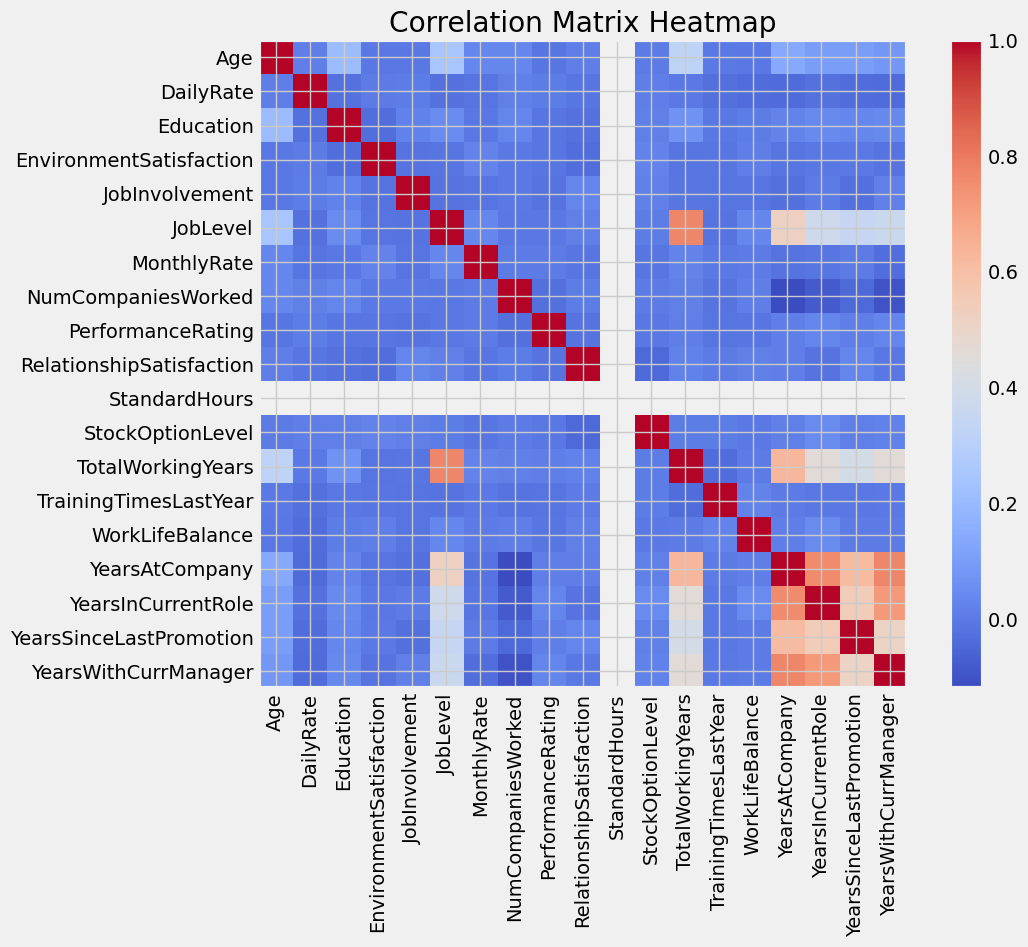

In [20]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

## Engineering Features

In [22]:
# Detect outliers using IQR method
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df

Outlier Count
Age                                   0
DailyRate                             0
Education                             0
EnvironmentSatisfaction               0
JobInvolvement                        0
JobLevel                              0
MonthlyRate                           0
NumCompaniesWorked                  810
PerformanceRating                  3600
RelationshipSatisfaction              0
StandardHours                         0
StockOptionLevel                   1326
TotalWorkingYears                   988
TrainingTimesLastYear              3751
WorkLifeBalance                       0
YearsAtCompany                     1042
YearsInCurrentRole                  338
YearsSinceLastPromotion            1675
YearsWithCurrManager                221

In [23]:
df_cleaned['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    8209
0.0    3144
3.0    2493
2.0    2303
4.0    2181
7.0    1167
6.0    1104
5.0     994
9.0     810
8.0     785
Name: count, dtype: int64

In [24]:
df_cleaned['PerformanceRating'].value_counts()

PerformanceRating
3.0    19590
4.0     3600
Name: count, dtype: int64

In [25]:
df_cleaned['StockOptionLevel'].value_counts()

StockOptionLevel
0.0    9938
1.0    9407
2.0    2519
3.0    1326
Name: count, dtype: int64

In [26]:
df_cleaned['TotalWorkingYears'].value_counts()

TotalWorkingYears
10.0    3214
6.0     1970
8.0     1626
9.0     1525
5.0     1381
7.0     1274
1.0     1264
4.0      978
12.0     751
3.0      665
15.0     617
16.0     610
11.0     567
13.0     566
21.0     536
17.0     511
14.0     486
2.0      482
20.0     476
18.0     423
23.0     352
19.0     349
22.0     327
24.0     286
26.0     221
28.0     220
25.0     219
0.0      202
29.0     159
32.0     148
31.0     146
33.0     110
27.0     104
30.0     103
36.0      90
34.0      81
37.0      55
35.0      45
40.0      35
38.0      16
Name: count, dtype: int64

In [27]:
df_cleaned['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2.0    8641
3.0    7729
4.0    1949
5.0    1861
1.0    1120
6.0    1036
0.0     854
Name: count, dtype: int64

In [28]:
df_cleaned['YearsAtCompany'].value_counts()

YearsAtCompany
5.0     3084
1.0     2687
3.0     2005
2.0     1993
10.0    1913
4.0     1736
7.0     1405
9.0     1286
8.0     1259
6.0     1200
0.0      726
11.0     509
20.0     434
13.0     366
15.0     309
14.0     303
22.0     237
12.0     218
21.0     217
18.0     203
16.0     196
19.0     174
17.0     142
24.0      95
33.0      84
26.0      64
25.0      64
32.0      48
31.0      48
23.0      32
27.0      31
29.0      30
36.0      30
34.0      16
37.0      16
30.0      15
40.0      15
Name: count, dtype: int64

In [29]:
df_cleaned['YearsInCurrentRole'].value_counts()

YearsInCurrentRole
2.0     5878
0.0     3877
7.0     3488
3.0     2121
4.0     1611
8.0     1415
9.0     1063
1.0      875
6.0      589
5.0      585
10.0     452
11.0     358
13.0     218
14.0     174
12.0     148
15.0     133
16.0     110
17.0      63
18.0      32
Name: count, dtype: int64

In [30]:
df_cleaned['YearsSinceLastPromotion'].value_counts()

YearsSinceLastPromotion
0.0     9178
1.0     5624
2.0     2514
7.0     1206
4.0      954
3.0      835
5.0      703
6.0      501
11.0     374
8.0      281
9.0      266
15.0     204
13.0     157
12.0     155
14.0     143
10.0      95
Name: count, dtype: int64

In [31]:
df_cleaned['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2.0     5410
0.0     4151
7.0     3413
3.0     2230
8.0     1683
4.0     1550
1.0     1199
9.0     1032
5.0      487
6.0      454
10.0     429
11.0     346
12.0     274
13.0     233
17.0     112
14.0      78
15.0      78
16.0      31
Name: count, dtype: int64

In [32]:
# Create a dictionary with unique values and their data types for each column
unique_values_dict = {col: (df_cleaned[col].dtype, df_cleaned[col].unique()) for col in df_cleaned.columns}

# Convert the dictionary into a DataFrame for better readability
unique_values_df = pd.DataFrame([(col, unique_values_dict[col][0], unique_values_dict[col][1]) 
                                 for col in unique_values_dict], columns=['Column', 'Data Type', 'Unique Values'])
unique_values_df

# COnvert Age column to int
# Encode target column to int
# Convert DistanceFromHome, ApplicationID,EmployeeNumber,EmployeeCount ,HourlyRate,JobSatisfaction,MonthlyIncome , PercentSalaryHike to int
# Drop StandardHours, EmployeeCount, EmployeeNumber, ApplicationID,Over18
# OverTime to 1 and 0

Column Data Type  \
0                        Age   float64   
1                  Attrition    object   
2             BusinessTravel    object   
3                  DailyRate   float64   
4                 Department    object   
5           DistanceFromHome    object   
6                  Education   float64   
7             EducationField    object   
8              EmployeeCount    object   
9             EmployeeNumber    object   
10             ApplicationID    object   
11   EnvironmentSatisfaction   float64   
12                    Gender    object   
13                HourlyRate    object   
14            JobInvolvement   float64   
15                  JobLevel   float64   
16                   JobRole    object   
17           JobSatisfaction    object   
18             MaritalStatus    object   
19             MonthlyIncome    object   
20               MonthlyRate   float64   
21        NumCompaniesWorked   float64   
22                    Over18    object   
23                  OverTime    object   
24         PercentSalaryHike    object   
25         PerformanceRating   float64   
26  RelationshipSatisfaction   float64   
27             StandardHours   float64   
28          StockOptionLevel   float64   
29         TotalWorkingYears   float64   
30     TrainingTimesLastYear   float64   
31           WorkLifeBalance   float64   
32            YearsAtCompany   float64   
33        YearsInCurrentRole   float64   
34   YearsSinceLastPromotion   float64   
35      YearsWithCurrManager   float64   
36            EmployeeSource    object   

                                        Unique Values  
0   [41.0, 37.0, 18.0, 34.0, 24.0, 39.0, 30.0, 31....  
1           [Voluntary Resignation, Current employee]  
2      [Travel_Rarely, Travel_Frequently, Non-Travel]  
3   [1102.0, 1360.0, 1356.0, 1085.0, 143.0, 906.0,...  
4    [Sales, Research & Development, Human Resources]  
5   [1, 12, 20, 2, 4, 5, 22, 3, 10, 9, 14, 6, 19, ...  
6                           [2.0, 3.0, 4.0, 1.0, 5.0]  
7   [Life Sciences, Technical Degree, Medical, Mar...  
8                                                 [1]  
9   [1, 7, 8, 9, 10, 11, 13, 17, 18, 560, 561, 563...  
10  [123456, 123458, 123462, 123463, 123464, 12346...  
11                               [2.0, 4.0, 1.0, 3.0]  
12                                     [Female, Male]  
13  [94, 33, 41, 39, 49, 70, 50, 56, 54, 66, 57, 6...  
14                               [3.0, 2.0, 1.0, 4.0]  
15                          [2.0, 4.0, 5.0, 1.0, 3.0]  
16  [Sales Executive, Manager, Research Director, ...  
17                                       [4, 3, 1, 2]  
18                        [Single, Divorced, Married]  
19  [5993, 14756, 19566, 6825, 19545, 3140, 1200, ...  
20  [19479.0, 19730.0, 3854.0, 21173.0, 16280.0, 2...  
21  [8.0, 4.0, 2.0, 5.0, 0.0, 1.0, 9.0, 3.0, 6.0, ...  
22                                                [Y]  
23                                          [Yes, No]  
24  [11, 14, 12, 22, 18, 13, 17, 23, 20, 19, 16, 1...  
25                                         [3.0, 4.0]  
26                               [1.0, 3.0, 4.0, 2.0]  
27                                             [80.0]  
28                               [0.0, 3.0, 1.0, 2.0]  
29  [8.0, 21.0, 33.0, 10.0, 23.0, 4.0, 0.0, 5.0, 3...  
30                [0.0, 2.0, 5.0, 3.0, 1.0, 4.0, 6.0]  
31                               [1.0, 3.0, 2.0, 4.0]  
32  [6.0, 5.0, 29.0, 9.0, 22.0, 4.0, 0.0, 8.0, 31....  
33  [4.0, 0.0, 8.0, 7.0, 15.0, 3.0, 2.0, 6.0, 10.0...  
34  [0.0, 11.0, 4.0, 15.0, 7.0, 14.0, 1.0, 3.0, 2....  
35  [5.0, 2.0, 10.0, 8.0, 0.0, 7.0, 3.0, 4.0, 6.0,...  
36  [Referral, Company Website, Indeed, GlassDoor,...

In [33]:
# List all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'uint8']).columns.tolist()

# Display the list of categorical columns
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'ApplicationID',
 'Gender',
 'HourlyRate',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'EmployeeSource']

In [34]:
df_cleaned['Attrition'].value_counts()

Attrition
Current employee         19527
Voluntary Resignation     3663
Name: count, dtype: int64

In [35]:
df_cleaned['DistanceFromHome'].value_counts() # can be converted to integer

DistanceFromHome
2     3302
1     3277
10    1359
3     1346
7     1330
9     1325
8     1270
5     1023
4     1014
6      938
16     500
11     461
24     430
29     429
23     428
18     418
15     416
26     395
25     390
20     375
28     363
19     351
14     333
12     330
13     304
22     304
17     300
21     285
27     194
Name: count, dtype: int64

In [36]:
df_cleaned['EducationField'].value_counts() # can be converted to integer

EducationField
Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1304
Human Resources      441
Test                   1
Name: count, dtype: int64

In [37]:
df_cleaned['HourlyRate'].value_counts() # can be converted to integer

HourlyRate
66    478
84    441
48    440
42    439
96    434
     ... 
69    235
68    220
53    218
38    206
34    189
Name: count, Length: 71, dtype: int64

In [38]:
df_cleaned['JobSatisfaction'].value_counts() # can be converted to integer

JobSatisfaction
4    7209
3    7019
1    4560
2    4402
Name: count, dtype: int64

In [39]:
df_cleaned['MonthlyIncome'].value_counts() # can be converted to integer

MonthlyIncome
2342     66
2559     54
5562     48
2380     48
6347     48
         ..
7260      8
2373      8
5980      8
10306     8
4559      7
Name: count, Length: 1349, dtype: int64

In [40]:
df_cleaned['PercentSalaryHike'].value_counts() # can be converted to integer

PercentSalaryHike
13    3317
11    3316
14    3180
12    3086
15    1578
18    1400
17    1302
16    1235
19    1203
22     883
20     864
21     765
23     443
24     338
25     280
Name: count, dtype: int64

In [41]:
df_cleaned['ApplicationID'].value_counts() # can be dropped as unique for each row

ApplicationID
123456    1
125592    1
125589    1
125585    1
125584    1
         ..
142884    1
142882    1
142782    1
142781    1
142800    1
Name: count, Length: 23190, dtype: int64

In [42]:
df_cleaned['EmployeeNumber'].value_counts() # can be dropped

EmployeeNumber
23244    6
10442    5
6325     5
10024    4
9568     4
        ..
19438    1
19437    1
19435    1
19431    1
19345    1
Name: count, Length: 23141, dtype: int64

In [43]:
df_cleaned['EmployeeCount'].value_counts() # can be dropped as only 1 unique value

EmployeeCount
1    23190
Name: count, dtype: int64

In [44]:
df_cleaned['StandardHours'].value_counts() # can be dropped as only 1 unique value

StandardHours
80.0    23190
Name: count, dtype: int64

In [45]:
df_cleaned['Over18'].value_counts() # can be dropped as only 1 unique value

Over18
Y    23190
Name: count, dtype: int64

In [46]:
non_numeric_values = df_cleaned[~df_cleaned['ApplicationID'].str.replace('.', '', regex=True).str.isnumeric()]
print(non_numeric_values[['ApplicationID']])

      ApplicationID
0            123456
1            123458
2            123462
3            123463
4            123464
...             ...
23428        142792
23429        142793
23430        142795
23431        142799
23432        142800

[23190 rows x 1 columns]


In [47]:
non_numeric_values = df_cleaned[~df_cleaned['ApplicationID'].astype(str).str.match(r'^\d+$', na=False)]
print(non_numeric_values['ApplicationID'].unique())
non_numeric_values

['?????' 'Test']


Age              Attrition BusinessTravel  DailyRate  \
10041  29.0       Current employee  Travel_Rarely      590.0   
14052  19.0  Voluntary Resignation     Non-Travel      504.0   

                   Department DistanceFromHome  Education EducationField  \
10041  Research & Development                4        3.0  Life Sciences   
14052  Research & Development               10        3.0        Medical   

      EmployeeCount EmployeeNumber  ... StandardHours  StockOptionLevel  \
10041             1          23225  ...          80.0               2.0   
14052             1          23518  ...          80.0               0.0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
10041              12.0                   3.0              3.0   
14052              10.0                   5.0              4.0   

       YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion  \
10041             6.0                3.0                     0.0   
14052             5.0                2.0                     0.0   

      YearsWithCurrManager   EmployeeSource  
10041                  1.0           Adzuna  
14052                  0.0  Company Website  

[2 rows x 37 columns]

In [48]:
df_cleaned = df_cleaned[df_cleaned['ApplicationID'].astype(str).str.match(r'^\d+$', na=False)]

In [49]:
df_cleaned.shape

(23188, 37)

In [50]:
# COnvert Age column to int
# Encode target column to int
# Convert DistanceFromHome, ApplicationID,EmployeeNumber,EmployeeCount ,HourlyRate,JobSatisfaction,MonthlyIncome , PercentSalaryHike to int
# Drop StandardHours, EmployeeCount, EmployeeNumber, ApplicationID,Over18
# OverTime to 1 and 0 

# Convert numerical features stored as object types to numeric values
numerical_columns_to_convert = ['DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'JobSatisfaction','ApplicationID']
for col in numerical_columns_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')



In [51]:
# Drop unnecessary columns that are unique identifiers or non-informative 
# can drop 'ApplicationID' too but keeping for more records
df_cleaned.drop(columns=['StandardHours','EmployeeNumber', 'EmployeeCount', 'Over18'], inplace=True, errors='ignore')

In [52]:
df_cleaned.shape

(23188, 33)

In [53]:
df_cleaned['Attrition'].value_counts()

Attrition
Current employee         19526
Voluntary Resignation     3662
Name: count, dtype: int64

In [54]:
# Encode target variable (y)
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Current employee': 0, 'Voluntary Resignation': 1})
df_cleaned['Attrition'].value_counts()


Attrition
0    19526
1     3662
Name: count, dtype: int64

## EDA

In [56]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23188 entries, 0 to 23432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23188 non-null  float64
 1   Attrition                 23188 non-null  int64  
 2   BusinessTravel            23188 non-null  object 
 3   DailyRate                 23188 non-null  float64
 4   Department                23188 non-null  object 
 5   DistanceFromHome          23188 non-null  int64  
 6   Education                 23188 non-null  float64
 7   EducationField            23188 non-null  object 
 8   ApplicationID             23188 non-null  int64  
 9   EnvironmentSatisfaction   23188 non-null  float64
 10  Gender                    23188 non-null  object 
 11  HourlyRate                23188 non-null  int64  
 12  JobInvolvement            23188 non-null  float64
 13  JobLevel                  23188 non-null  float64
 14  JobRole    

In [57]:
# General Dataset Overview
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'ApplicationID', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [58]:
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'EmployeeSource'],
      dtype='object')

## Univariate analysis

In [60]:
# Summary statistics for numerical columns
numerical_summary = df_cleaned[numerical_cols].describe()
numerical_summary

Age     Attrition     DailyRate  DistanceFromHome  \
count  23188.000000  23188.000000  23188.000000      23188.000000   
mean      36.924056      0.157927    802.268328          9.188675   
std        9.115791      0.364680    403.217597          8.098670   
min       18.000000      0.000000    102.000000          1.000000   
25%       30.000000      0.000000    465.000000          2.000000   
50%       36.000000      0.000000    802.000000          7.000000   
75%       43.000000      0.000000   1157.000000         14.000000   
max       60.000000      1.000000   1499.000000         29.000000   

          Education  ApplicationID  EnvironmentSatisfaction    HourlyRate  \
count  23188.000000   23188.000000             23188.000000  23188.000000   
mean       2.908746  135203.662412                 2.719855     65.855486   
std        1.024959    6776.650328                 1.094929     20.334604   
min        1.000000  123456.000000                 1.000000     30.000000   
25%        2.000000  129337.750000                 2.000000     48.000000   
50%        3.000000  135205.500000                 3.000000     66.000000   
75%        4.000000  141063.250000                 4.000000     83.000000   
max        5.000000  146972.000000                 4.000000    100.000000   

       JobInvolvement      JobLevel  ...  PerformanceRating  \
count    23188.000000  23188.000000  ...       23188.000000   
mean         2.730550      2.065336  ...           3.155210   
std          0.710119      1.105977  ...           0.362112   
min          1.000000      1.000000  ...           3.000000   
25%          2.000000      1.000000  ...           3.000000   
50%          3.000000      2.000000  ...           3.000000   
75%          3.000000      3.000000  ...           3.000000   
max          4.000000      5.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count              23188.000000      23188.000000       23188.000000   
mean                   2.713472          0.794420          11.269234   
std                    1.080738          0.850669           7.766080   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count           23188.000000     23188.000000    23188.000000   
mean                2.798775         2.761601        7.017078   
std                 1.289926         0.705294        6.138358   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count        23188.000000             23188.000000          23188.000000  
mean             4.230680                 2.182379              4.130800  
std              3.627102                 3.215829              3.571958  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 25 columns]

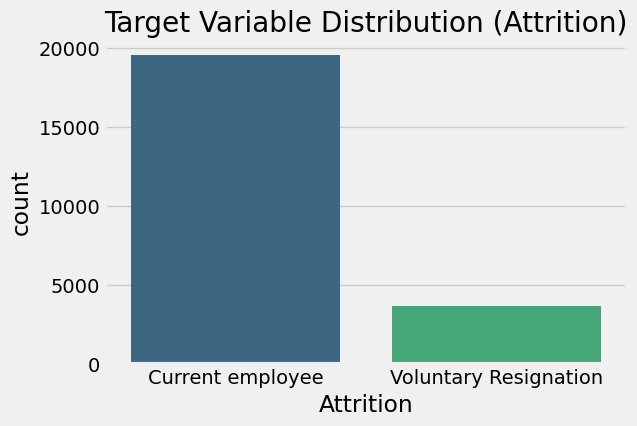

In [61]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_cleaned, palette='viridis')
plt.title('Target Variable Distribution (Attrition)')
plt.xticks(ticks=[0, 1], labels=['Current employee','Voluntary Resignation'])
plt.show()

###  Numerical Features Analysis

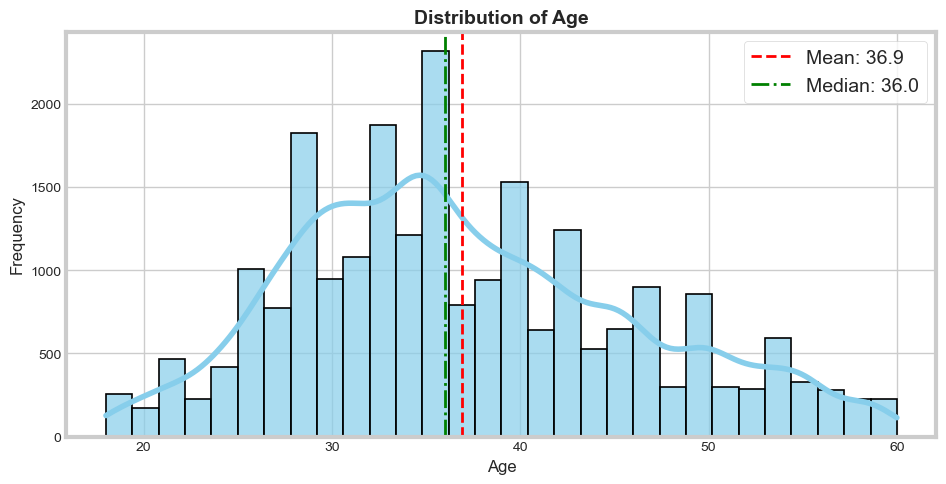

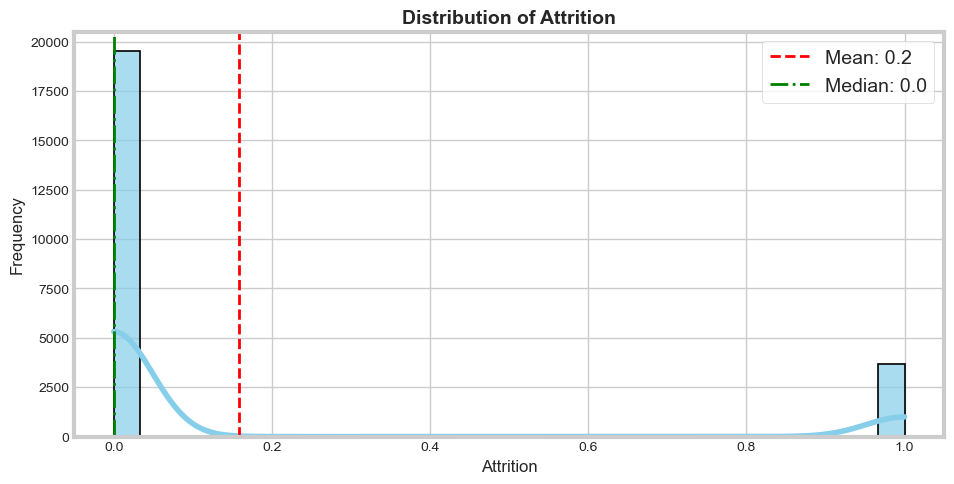

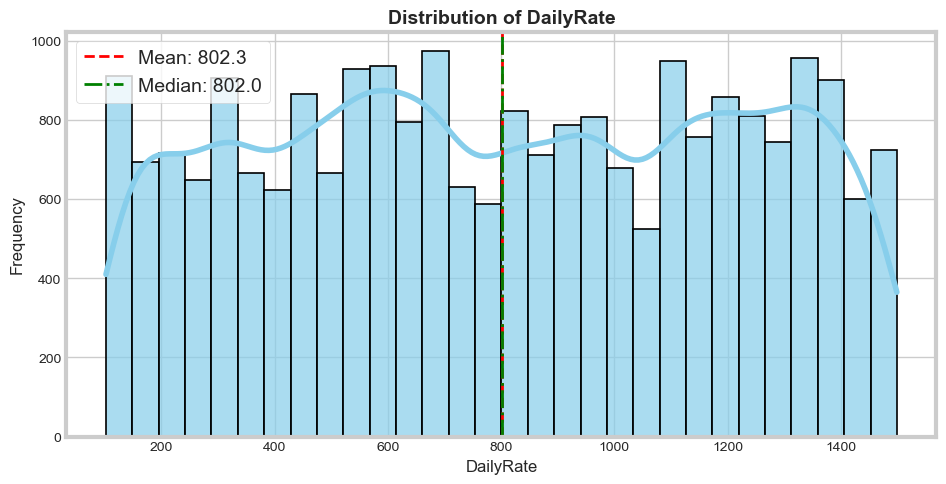

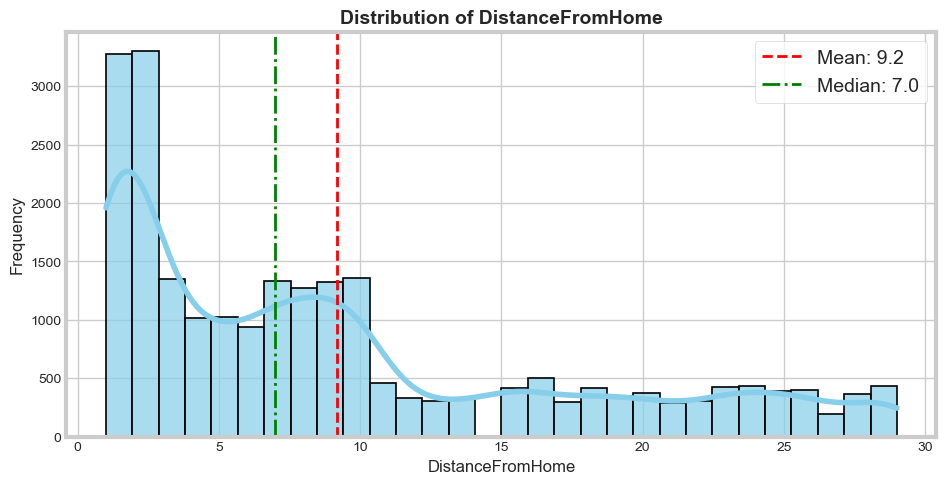

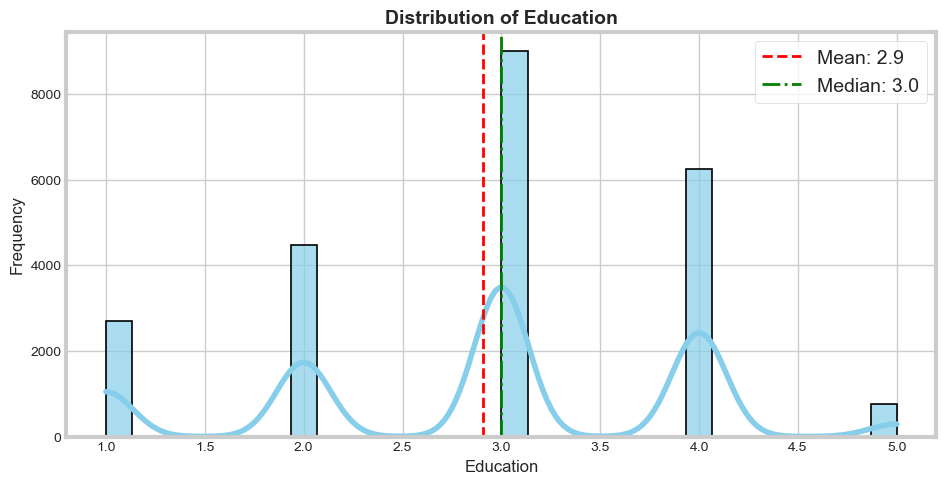

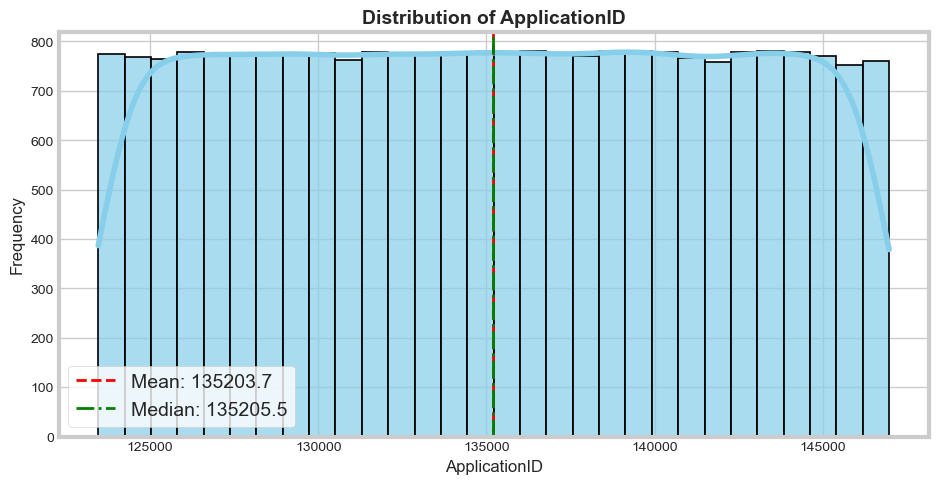

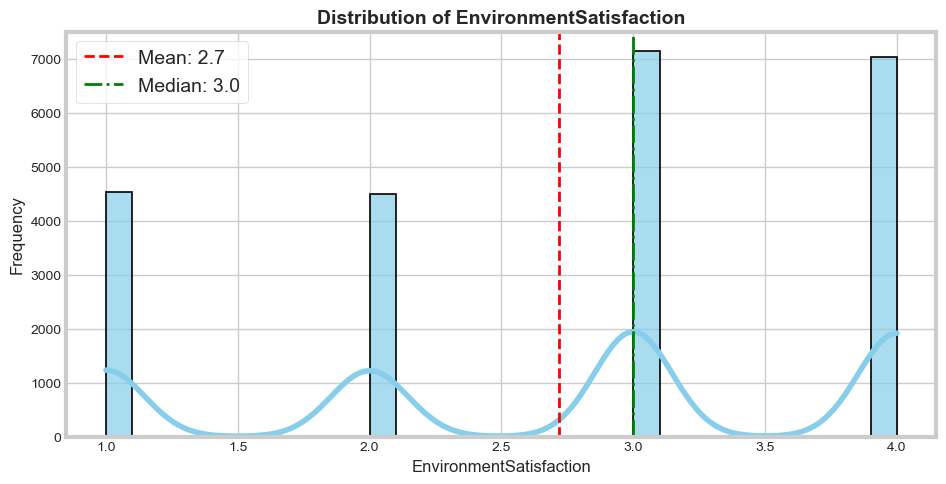

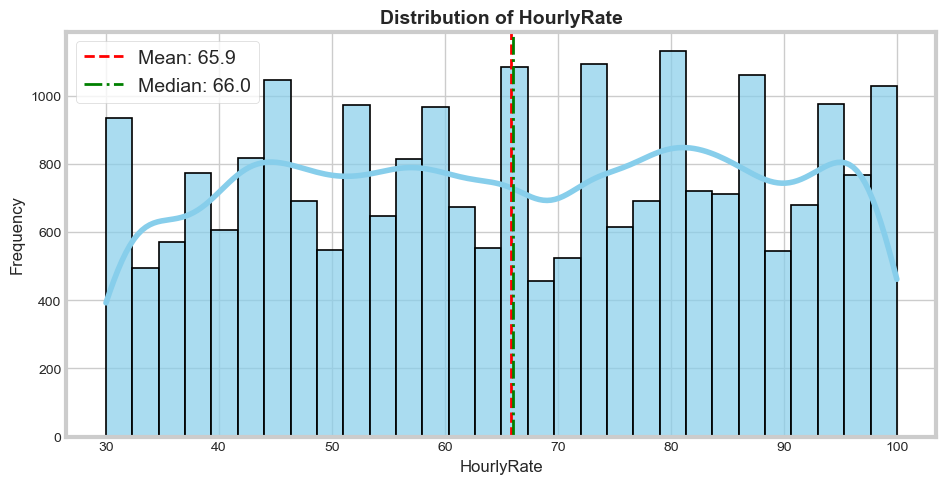

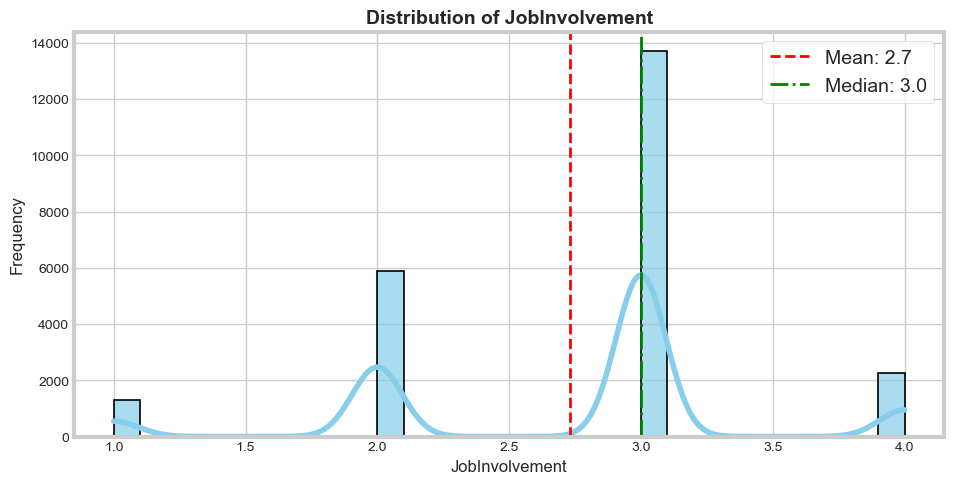

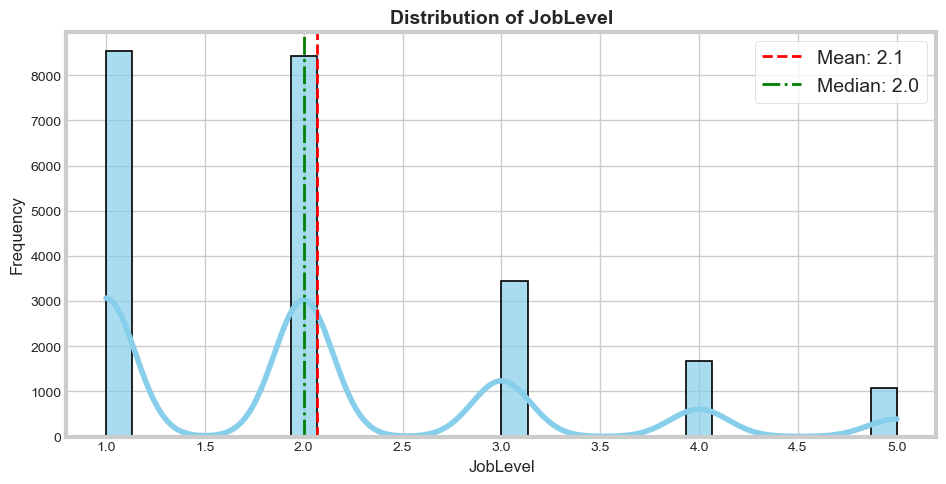

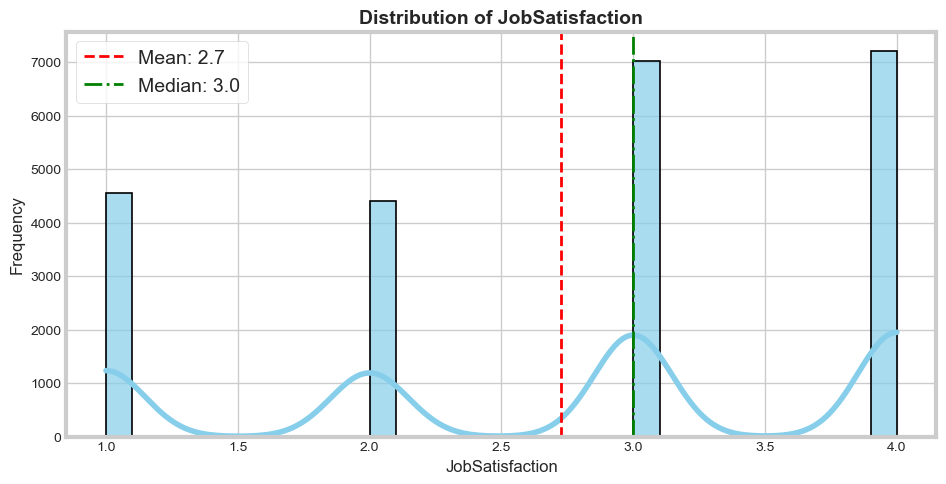

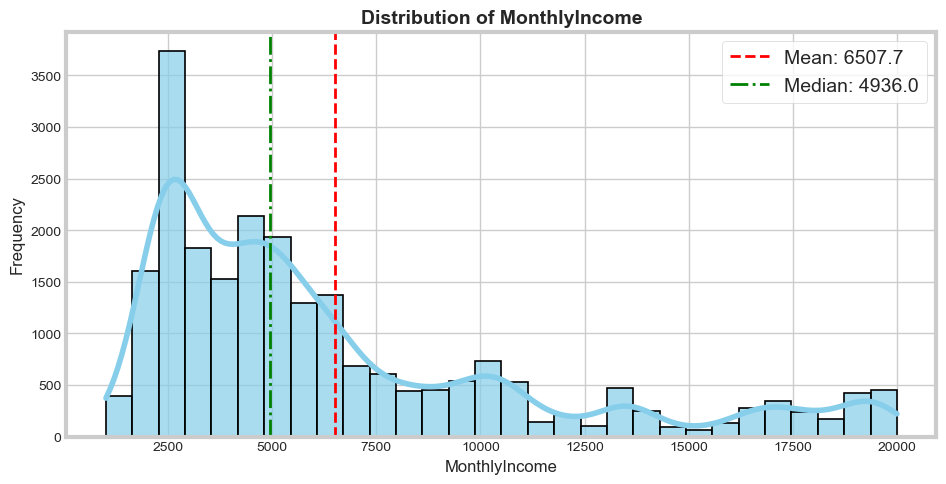

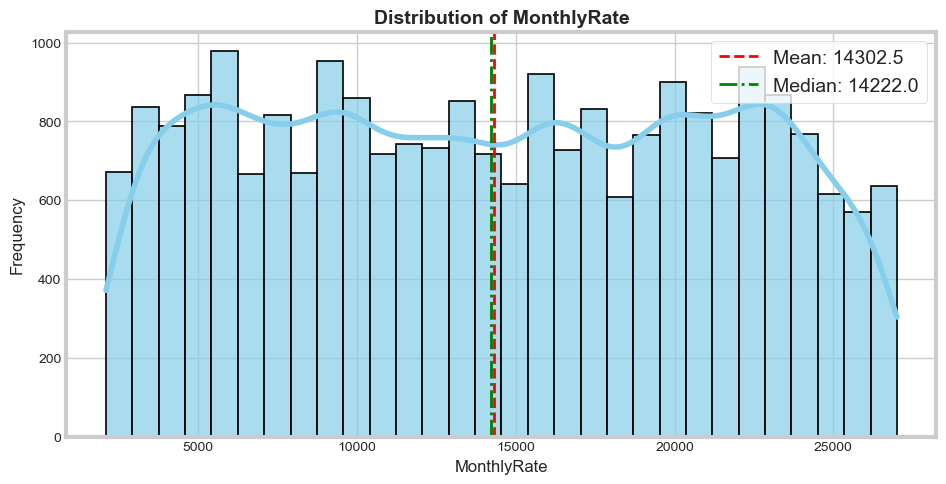

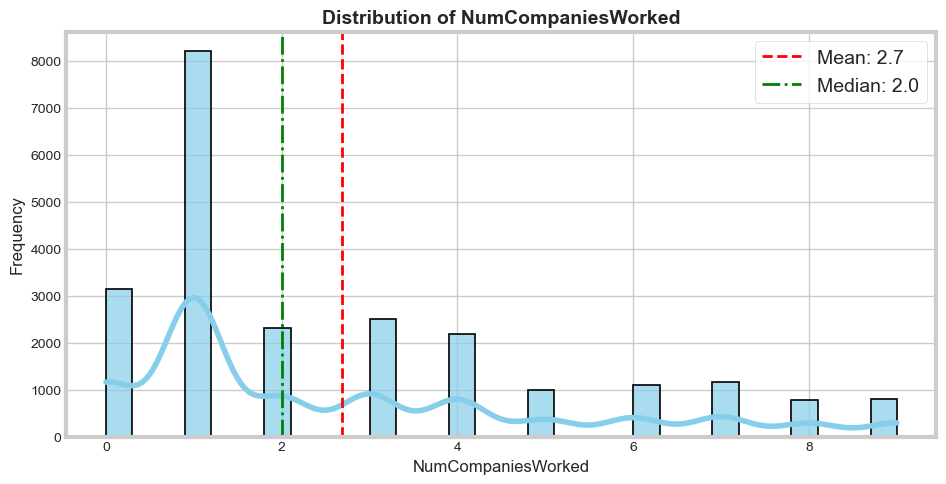

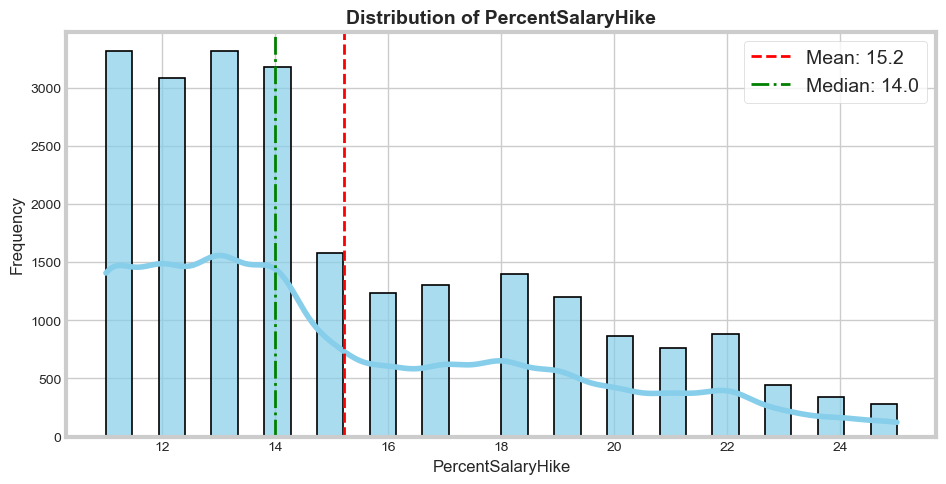

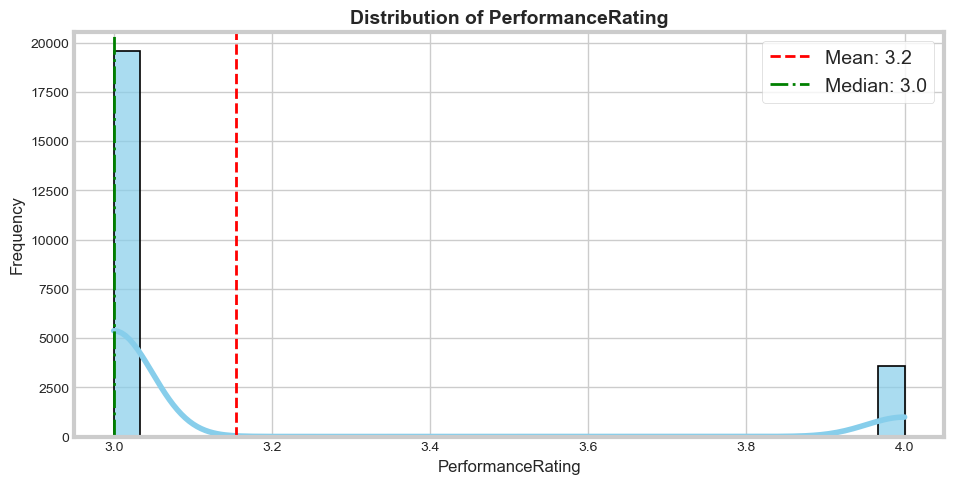

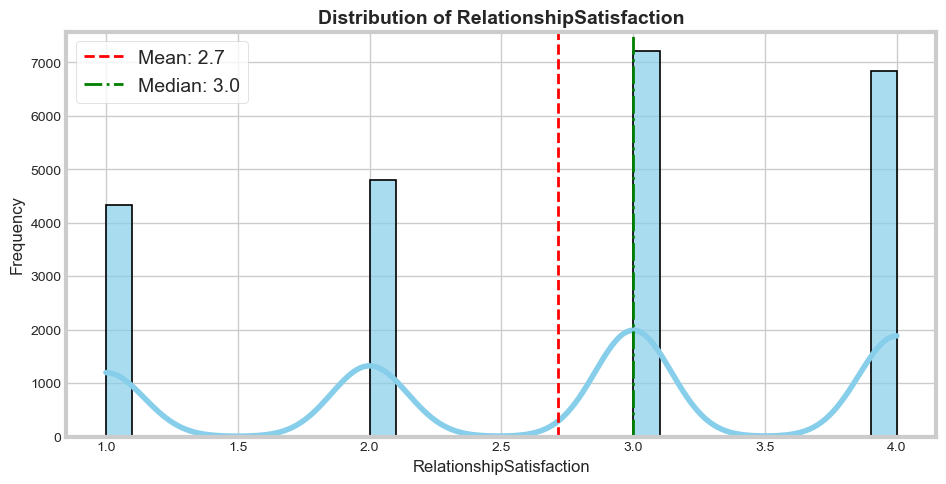

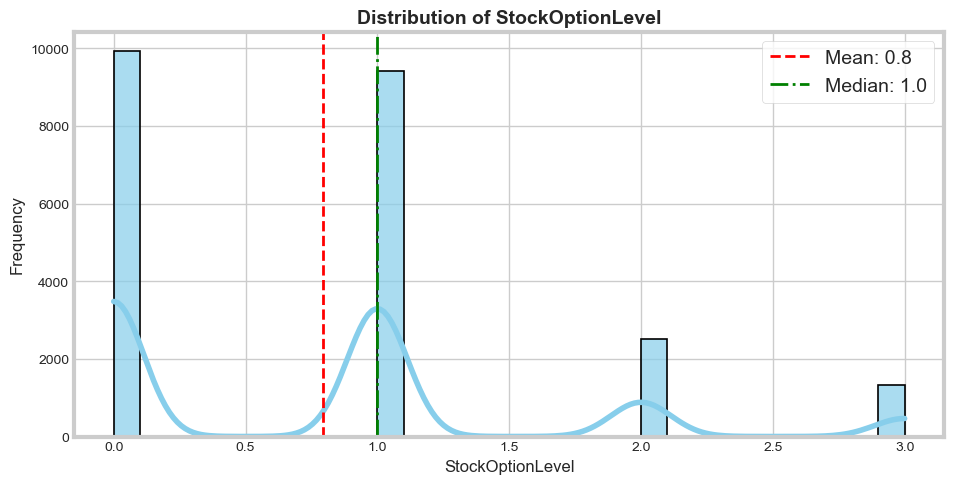

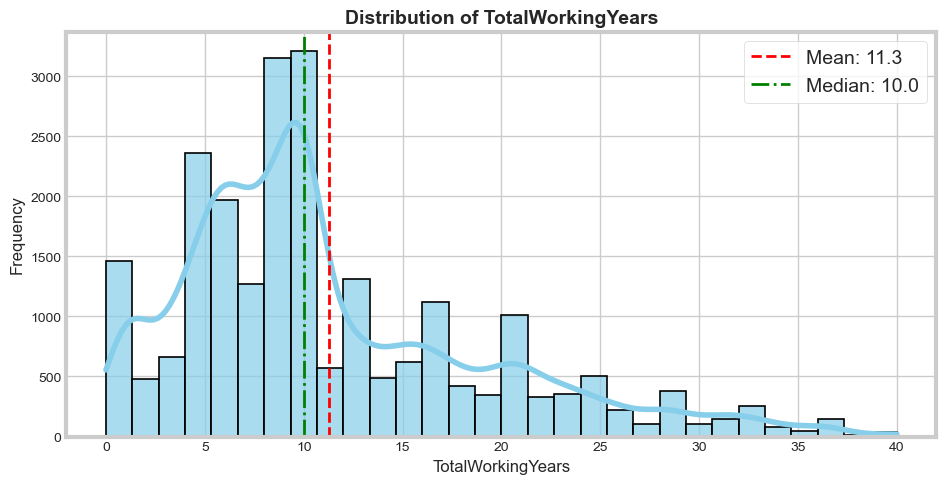

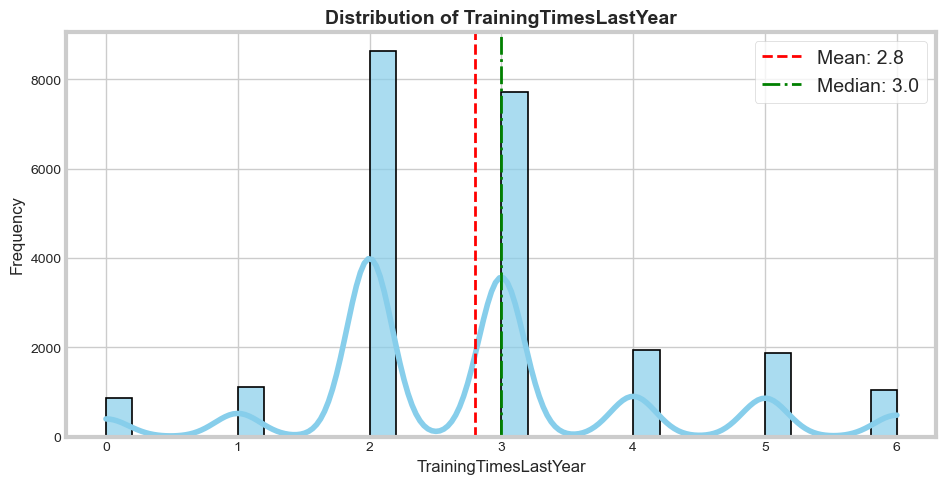

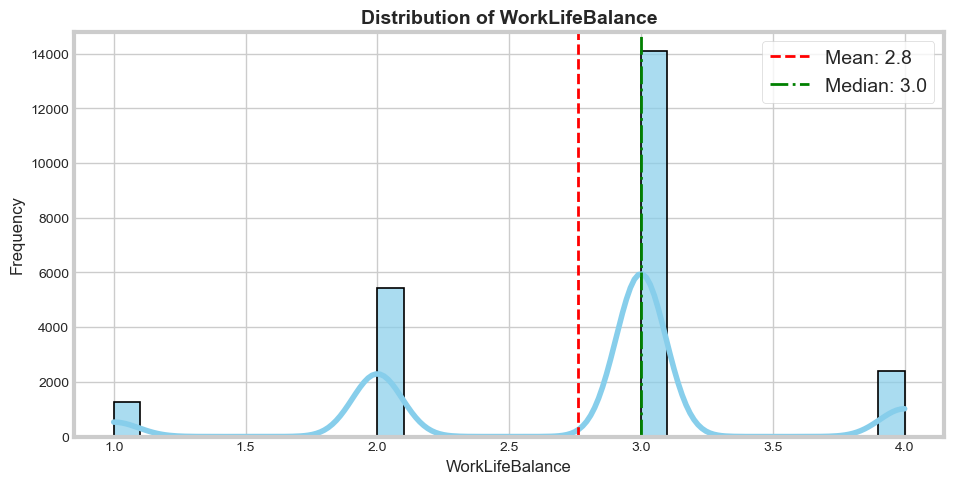

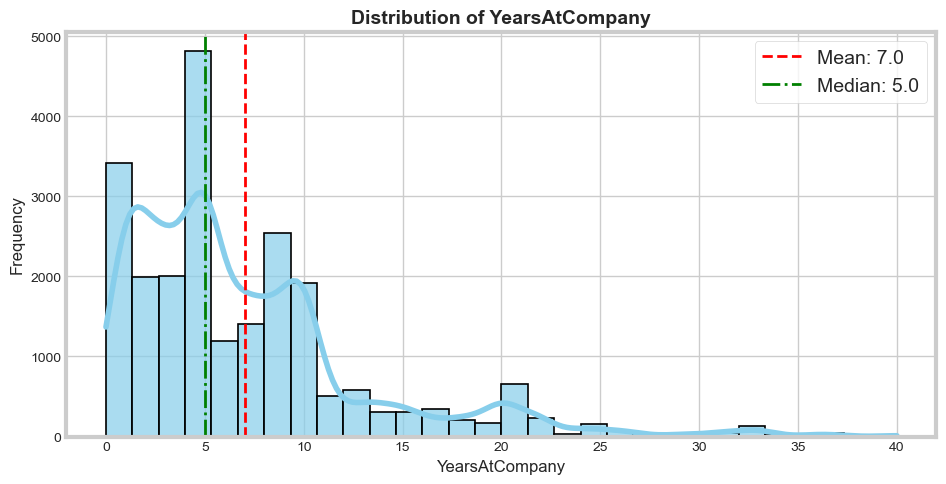

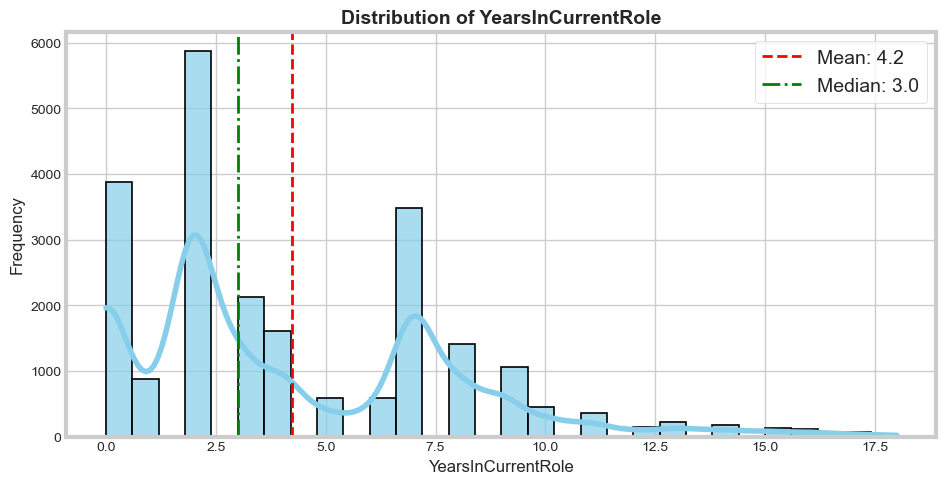

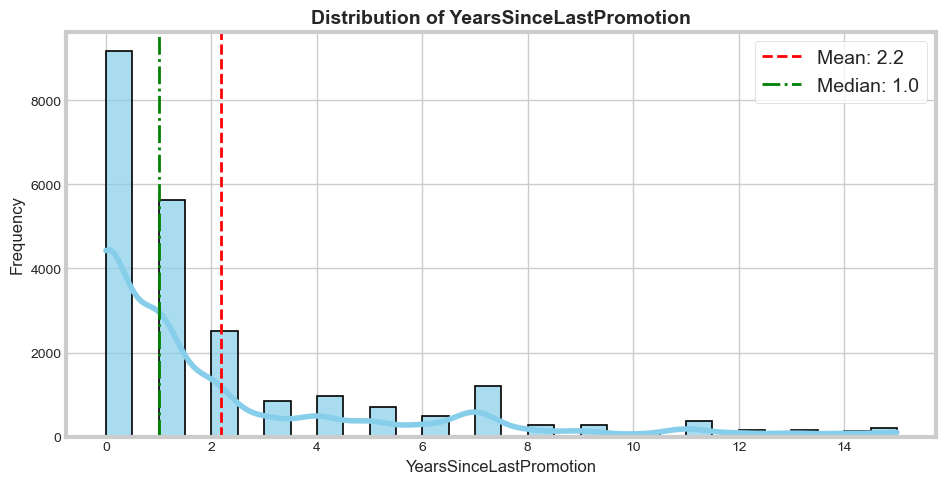

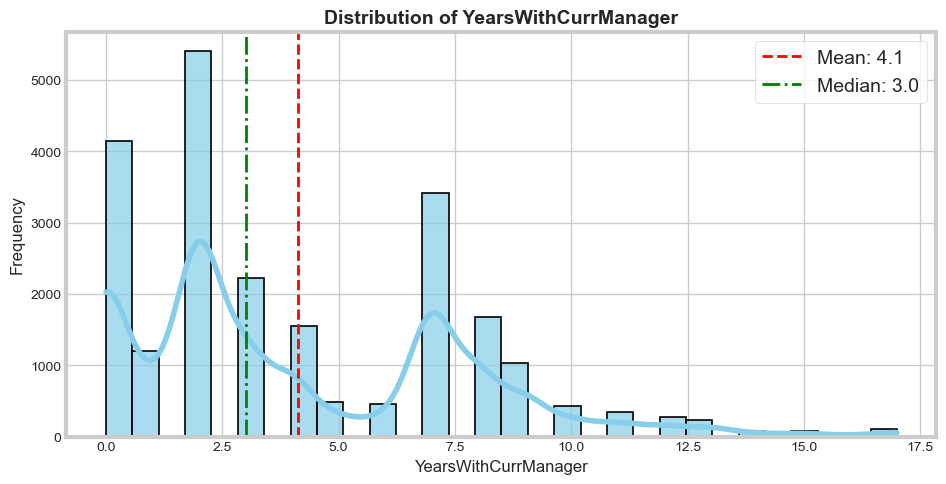

In [64]:
# Set plot style
sns.set_style("whitegrid")

# Univariate Analysis for Numerical Variables
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cleaned[col], bins=30, kde=True, color="skyblue", alpha=0.7, edgecolor="black", linewidth=1.2)
    
    # Add mean and median lines
    mean_val = df_cleaned[col].mean()
    median_val = df_cleaned[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.1f}')

    # Customize labels and title
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.show()

### Categorical Features Analysis: 

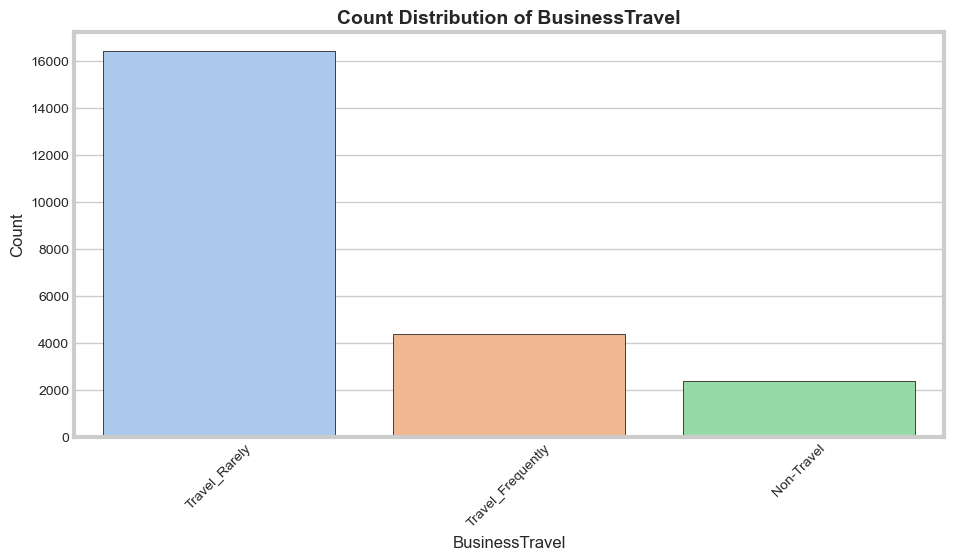

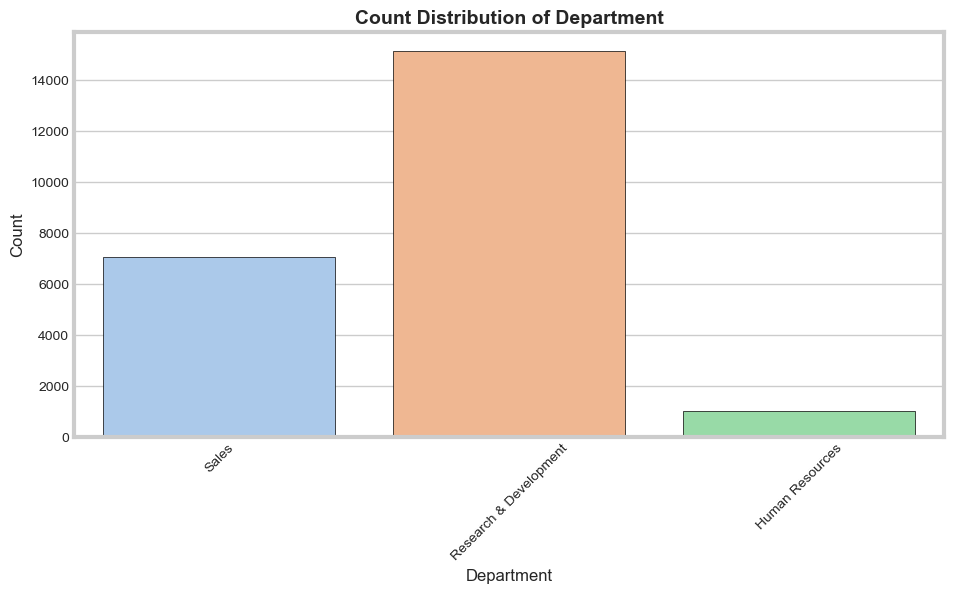

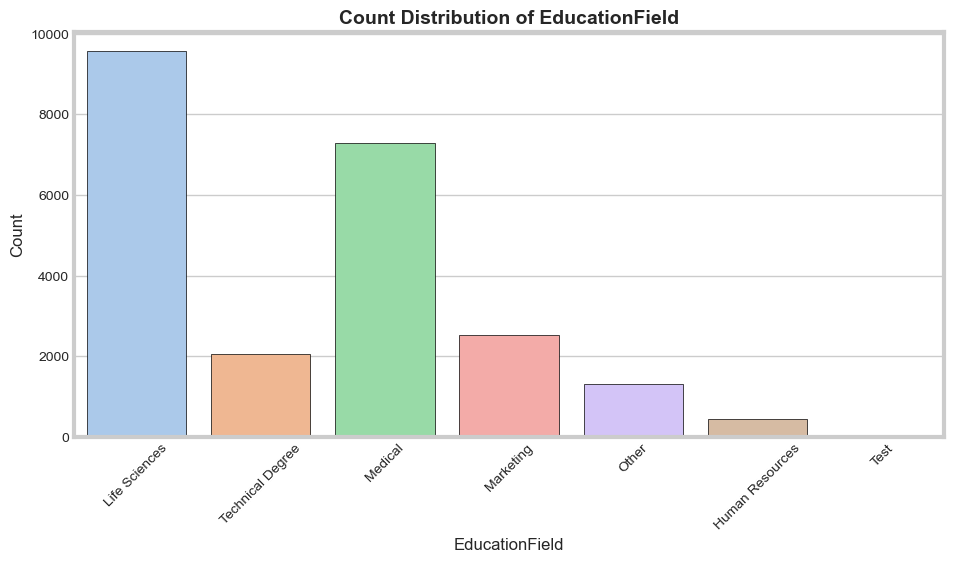

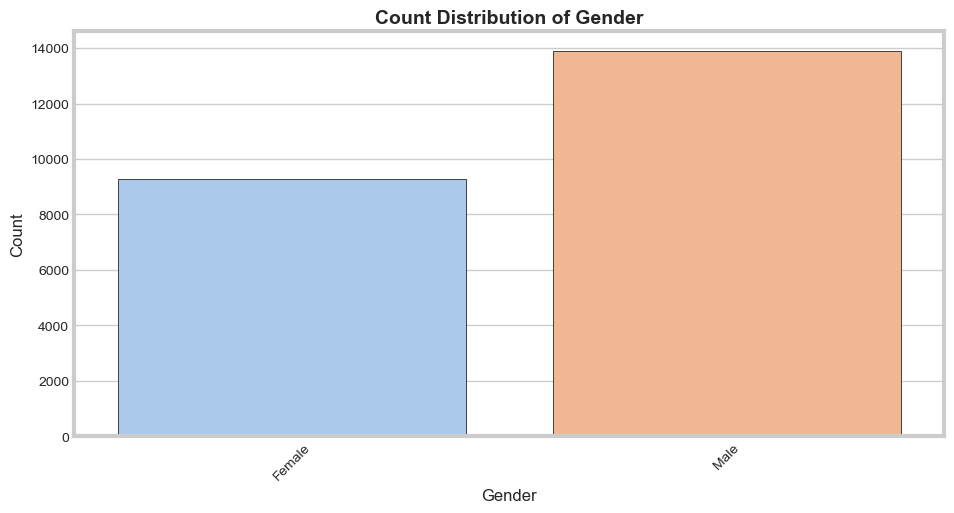

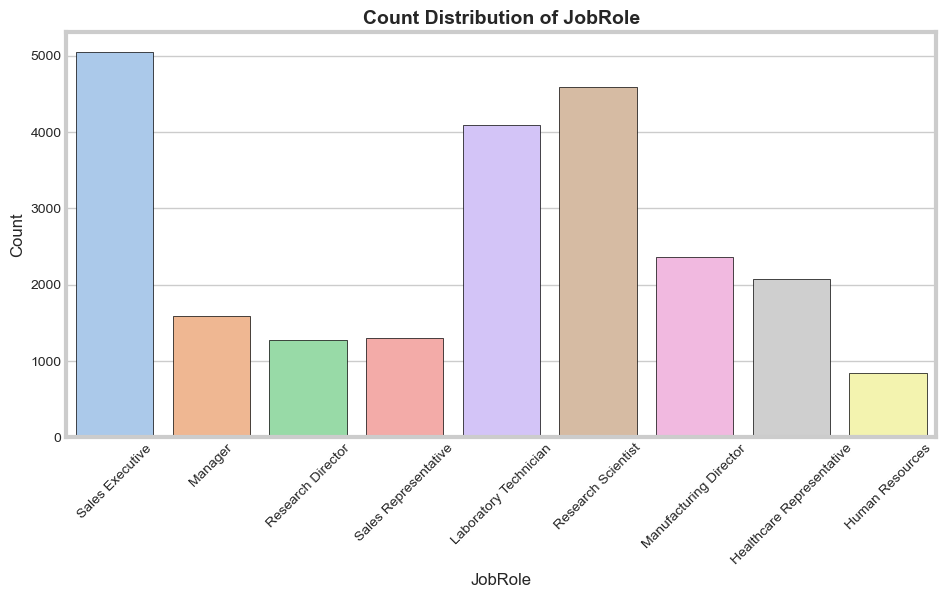

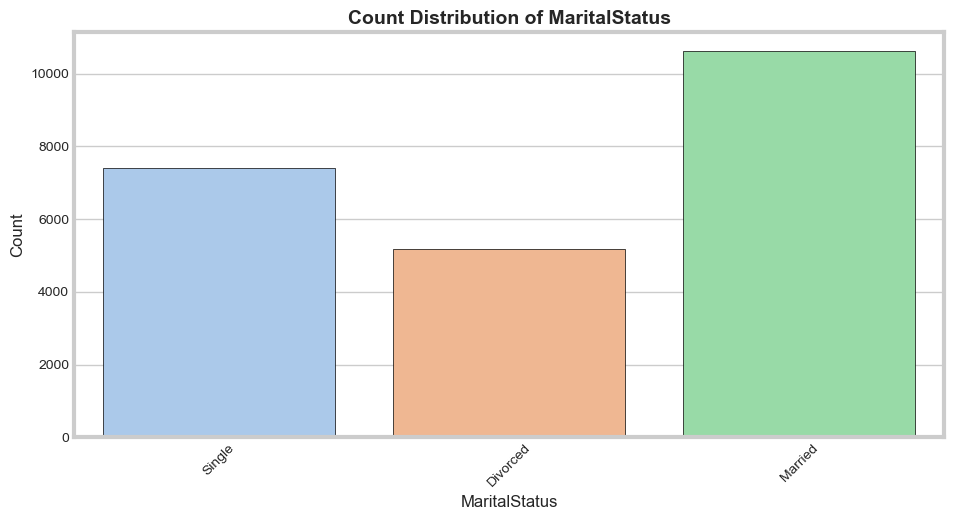

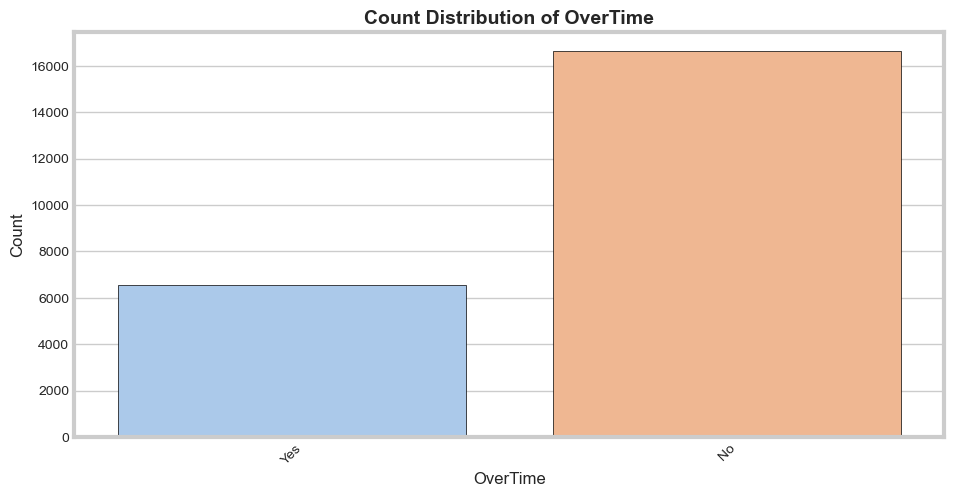

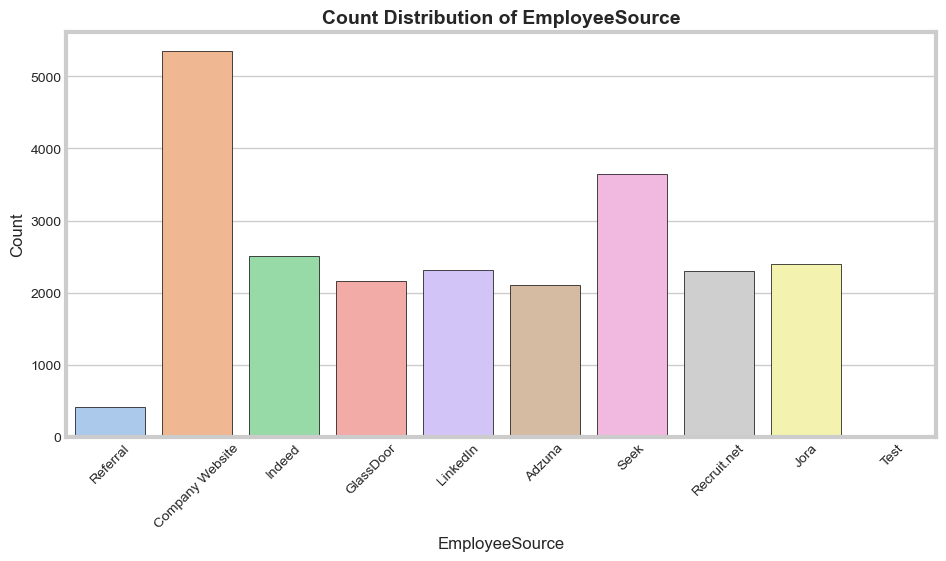

In [66]:
# Univariate Analysis for Categorical Variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col, palette="pastel", edgecolor="black")
    
    # Customize labels and title
    plt.title(f'Count Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # Display the plot
    plt.show()

## Bivariate analysis

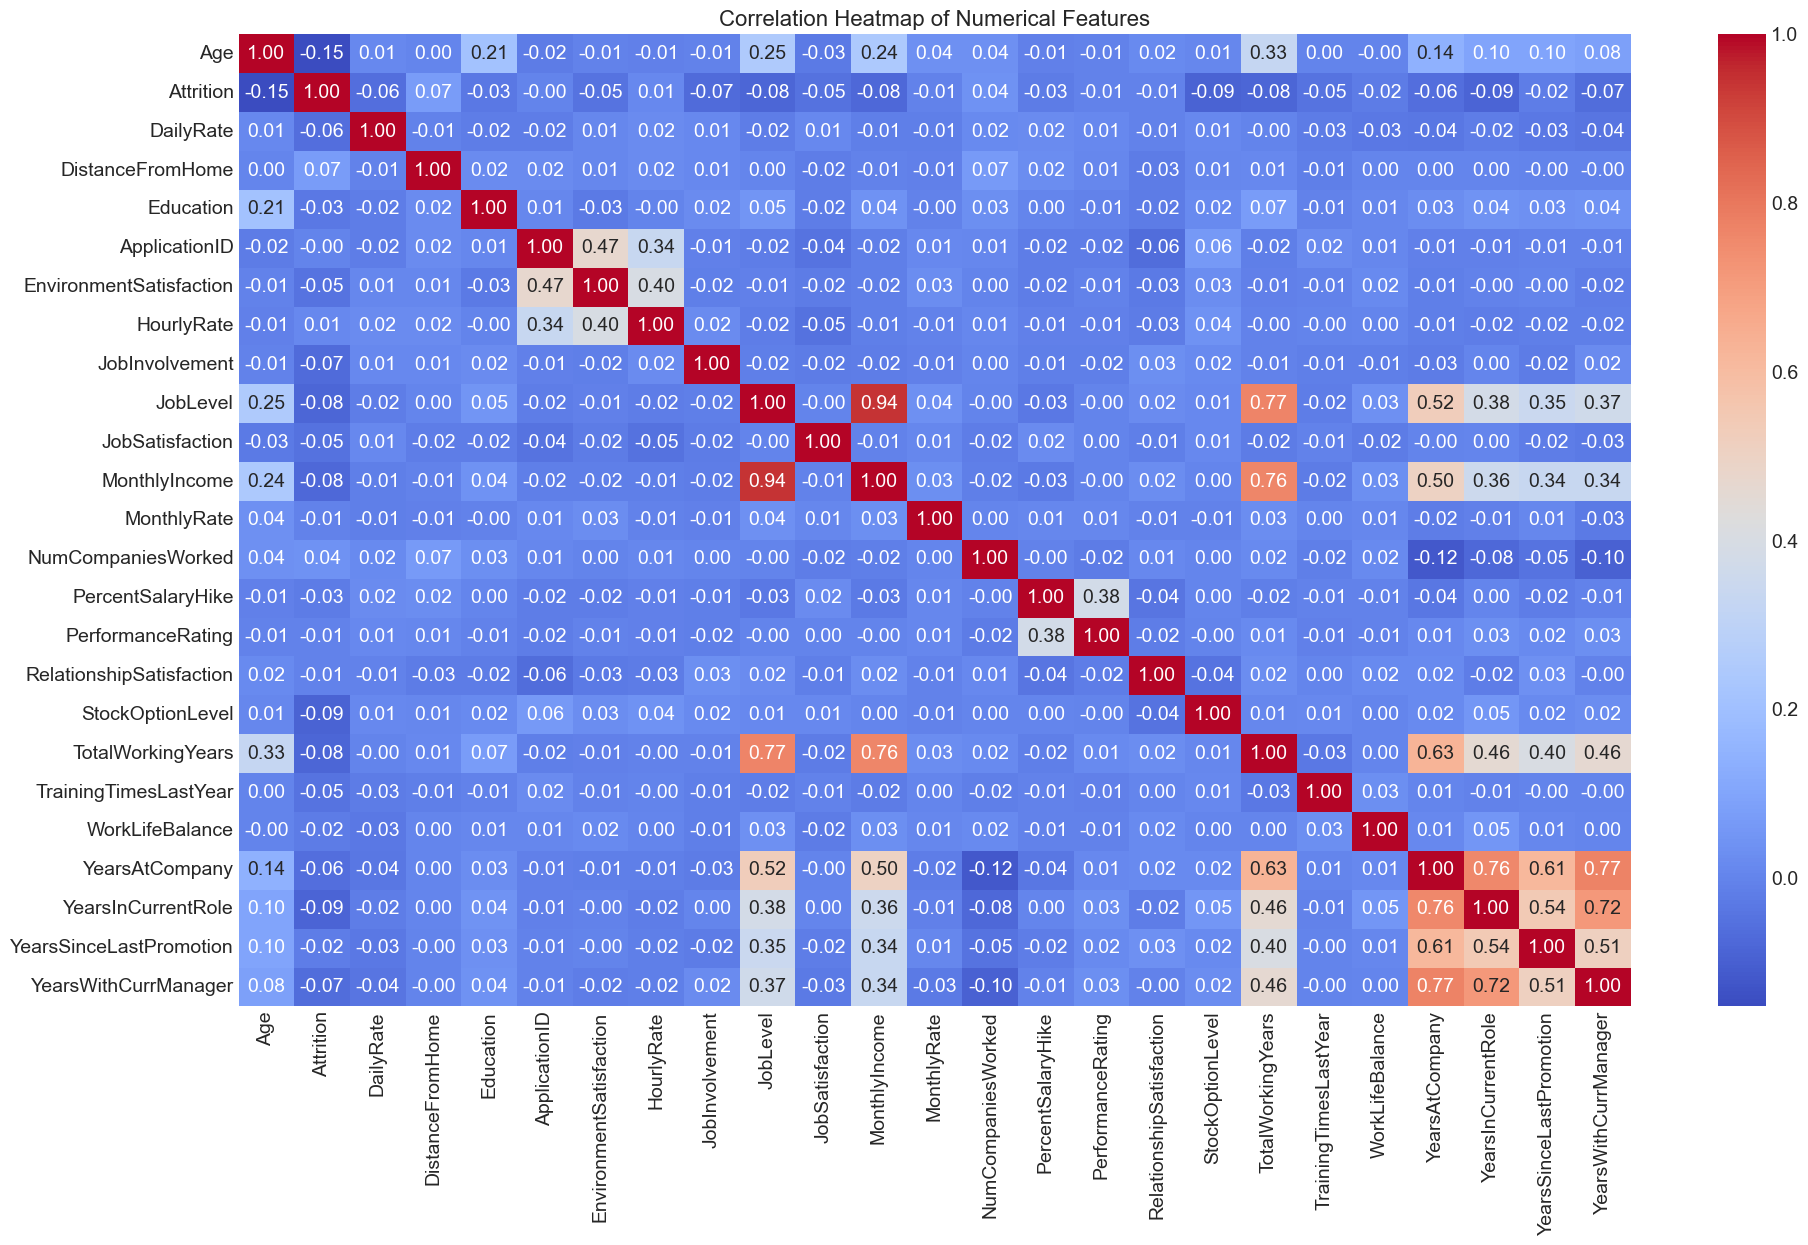

In [68]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
corr_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

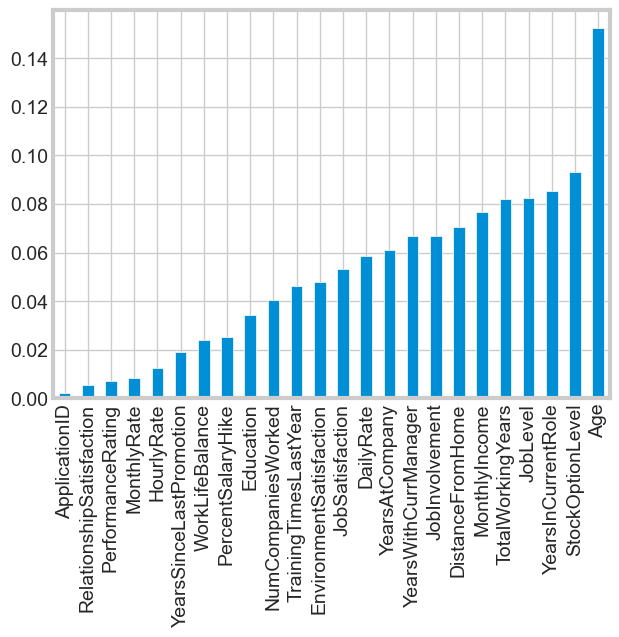

In [69]:
np.abs(corr_matrix["Attrition"]).sort_values()[:-1].plot(kind = "bar");

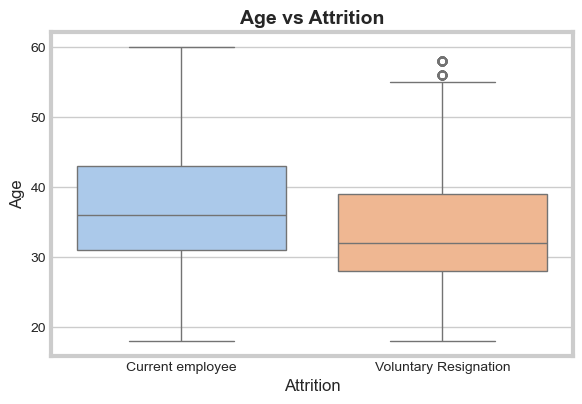

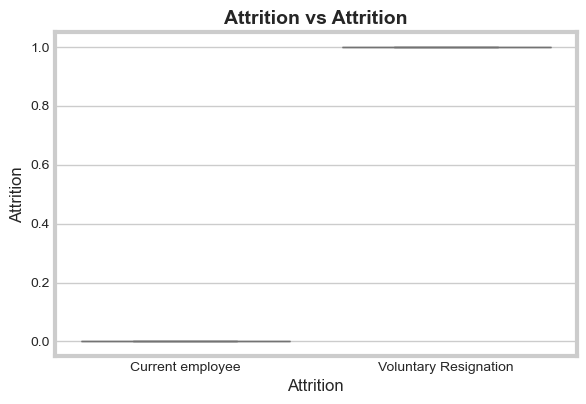

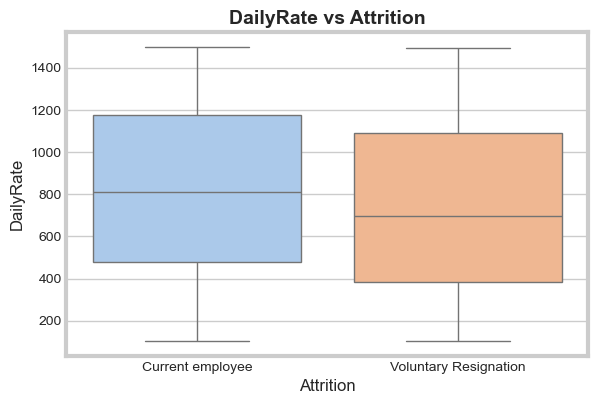

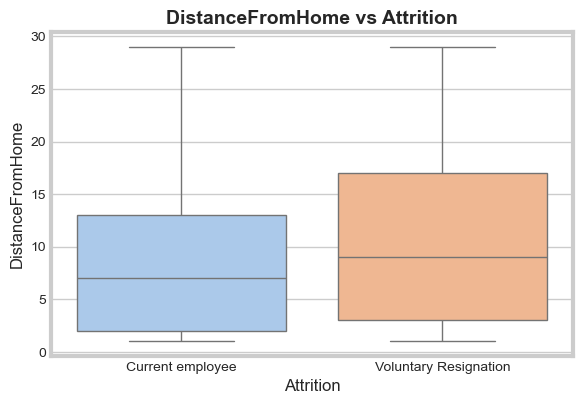

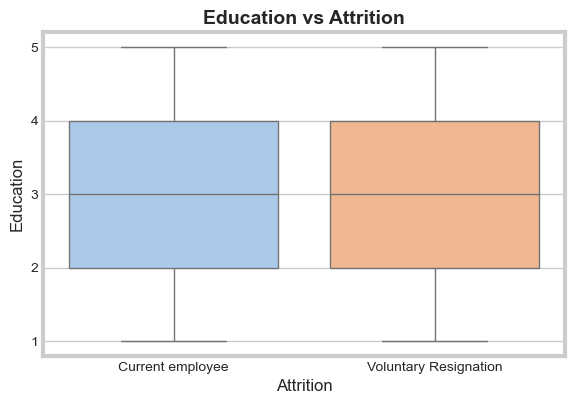

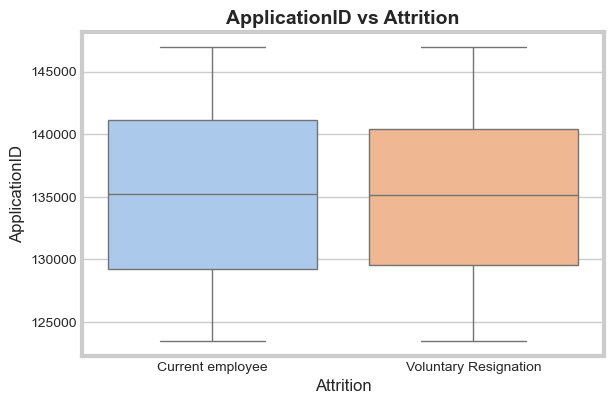

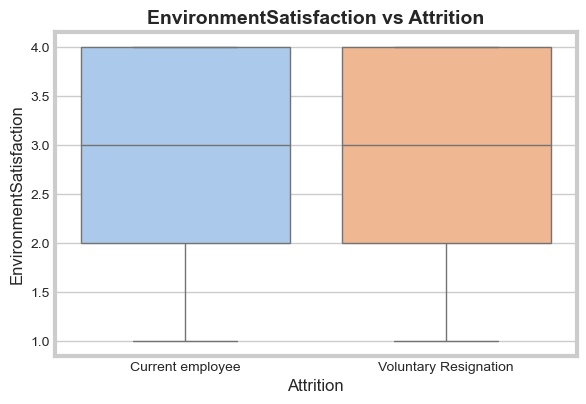

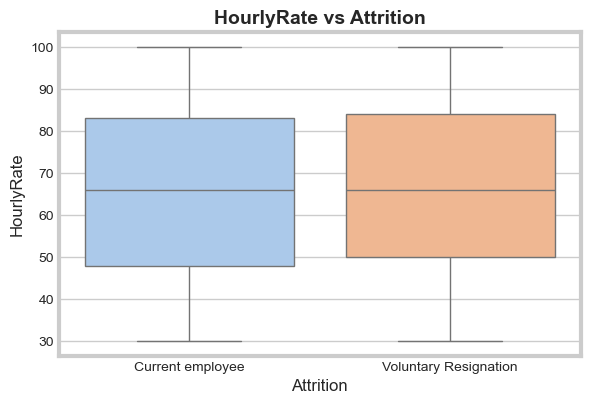

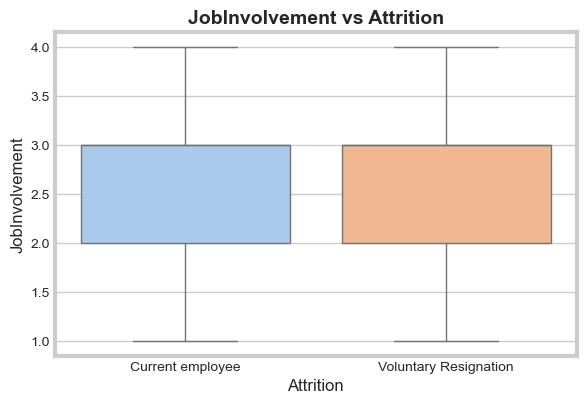

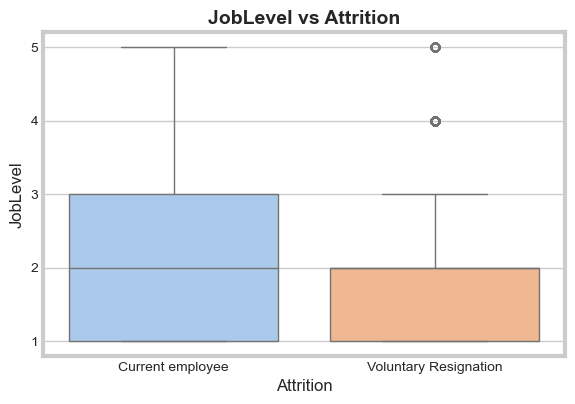

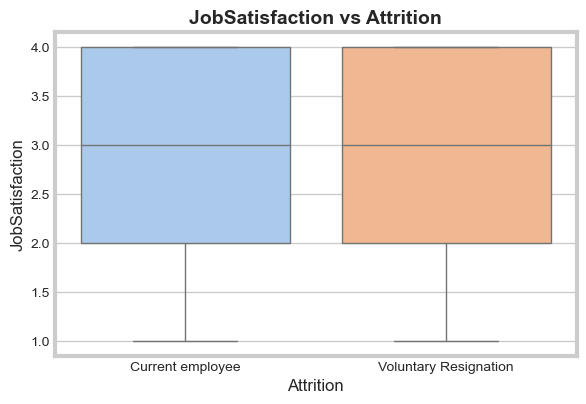

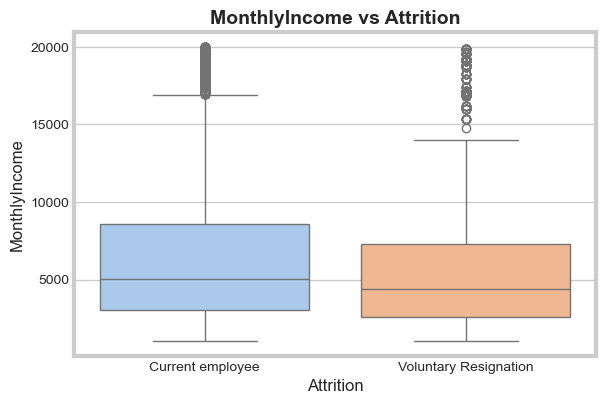

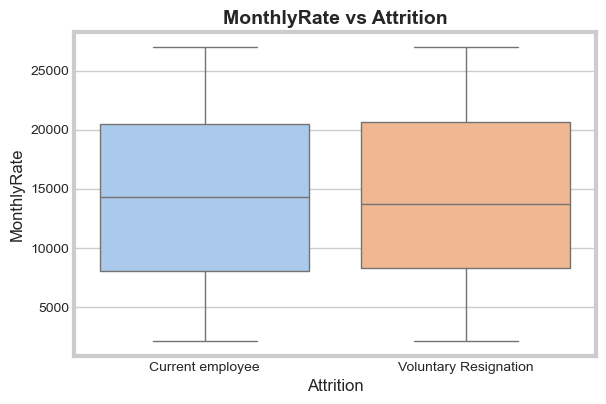

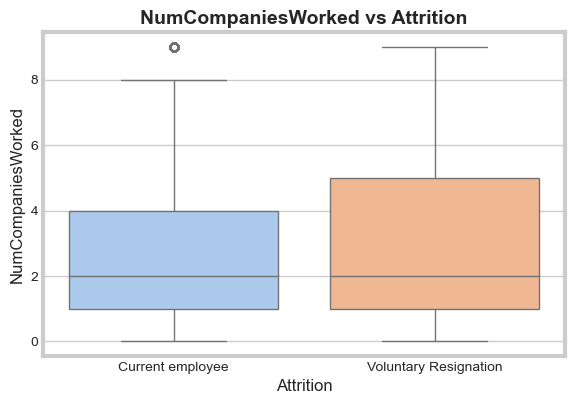

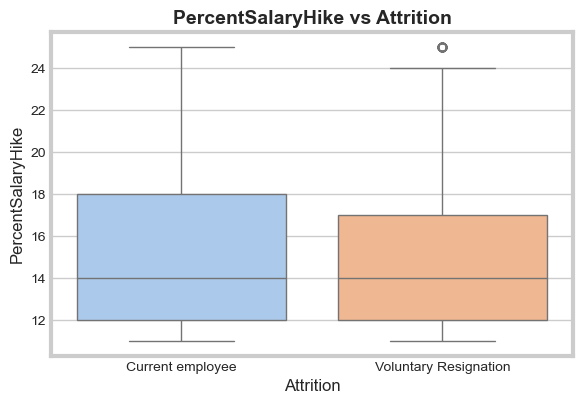

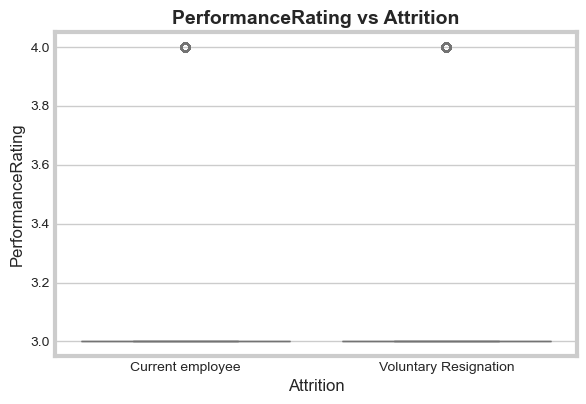

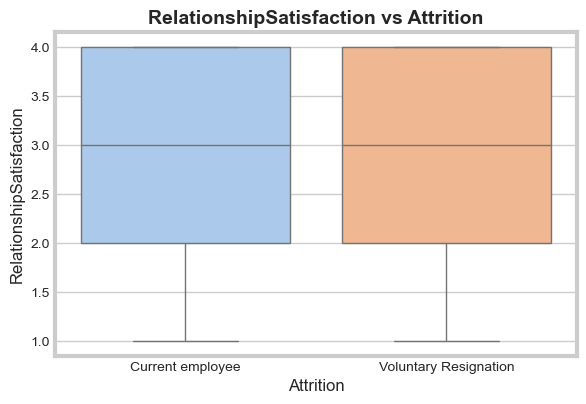

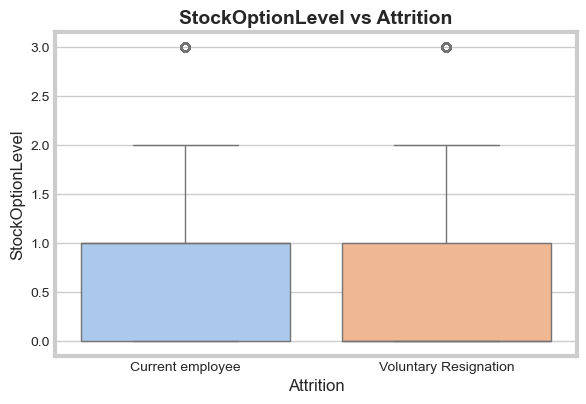

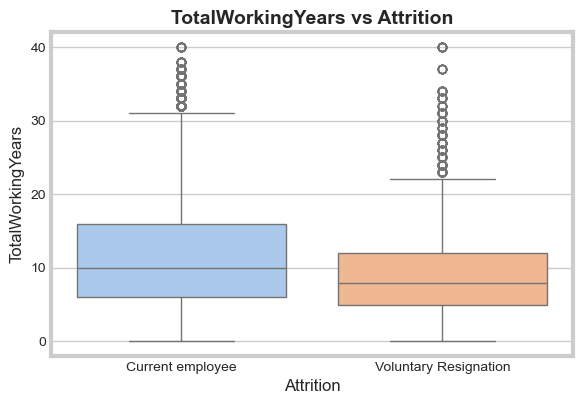

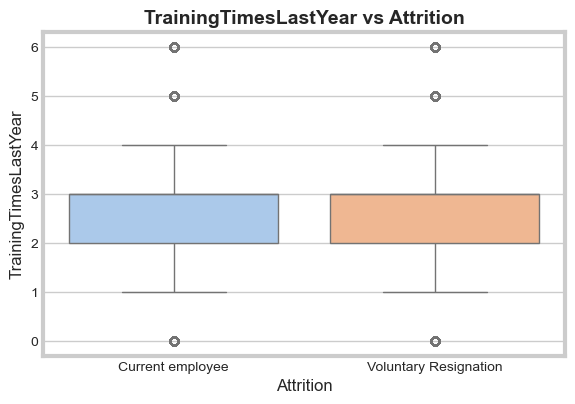

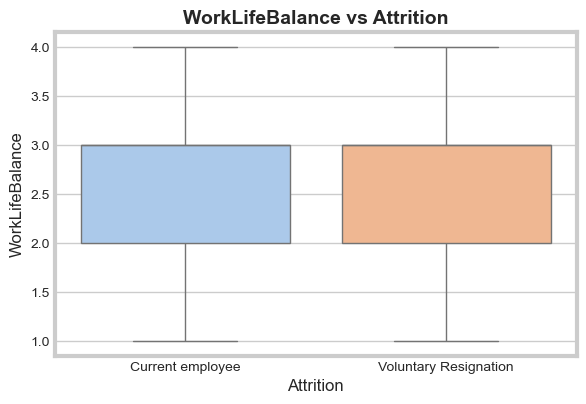

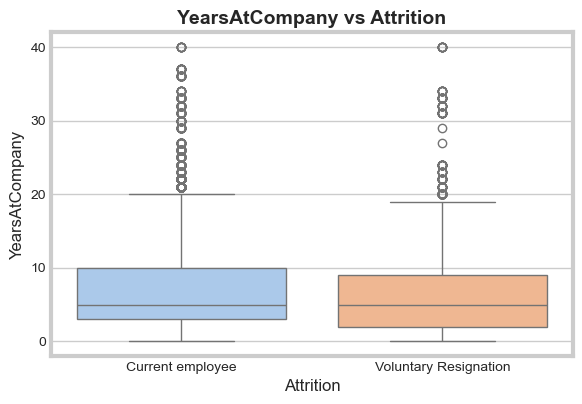

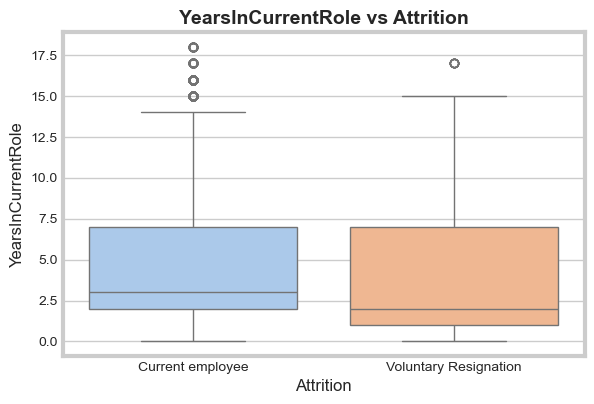

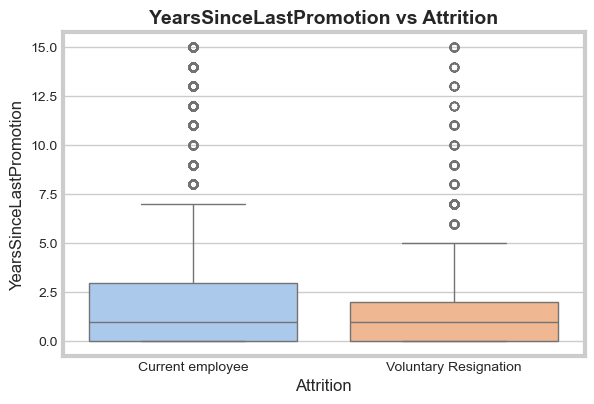

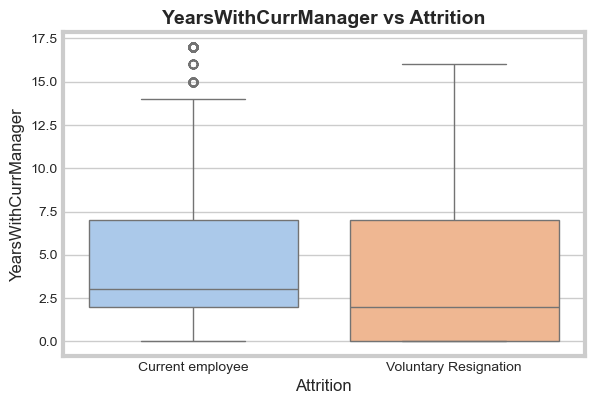

In [70]:
# Assume 'Attrition' is the target variable
target_col = "Attrition"

# Bivariate Analysis for Numerical vs Target (Attrition)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_cleaned, x=target_col, y=col, palette="pastel")
    
    # Customize labels and title
    plt.title(f'{col} vs {target_col}', fontsize=14, fontweight='bold')
    plt.xlabel(target_col, fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.xticks(ticks=[0, 1], labels=['Current employee','Voluntary Resignation'])
    plt.yticks(fontsize=10)
    
    # Display the plot
    plt.show()

In [71]:
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'EmployeeSource'],
      dtype='object')

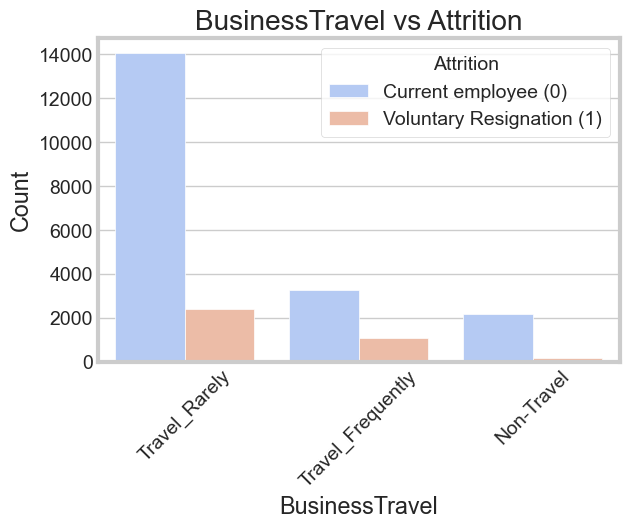

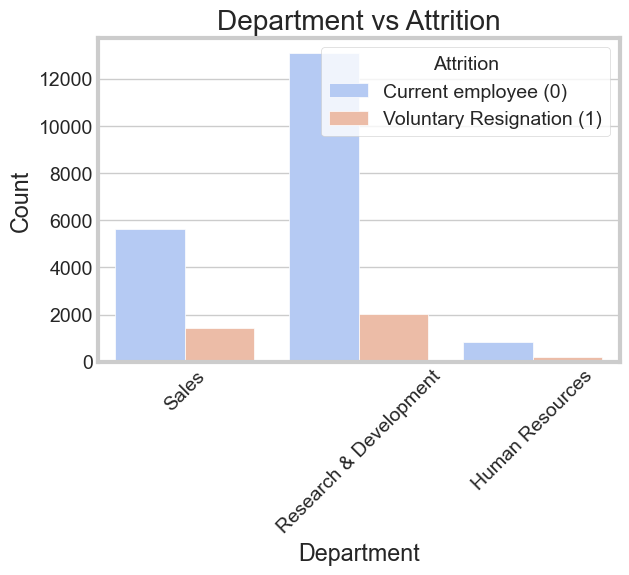

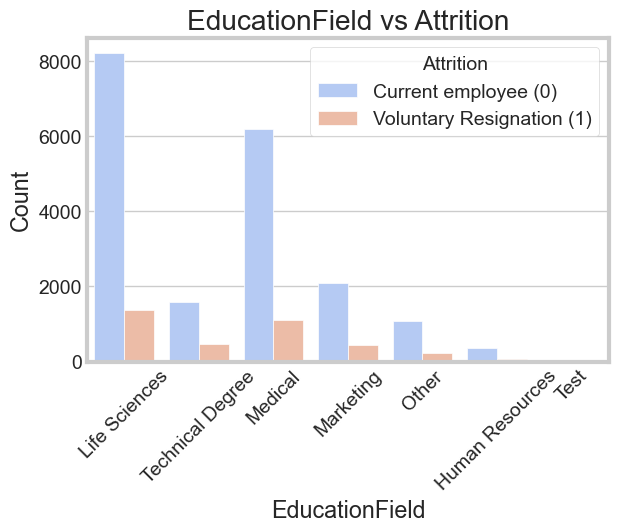

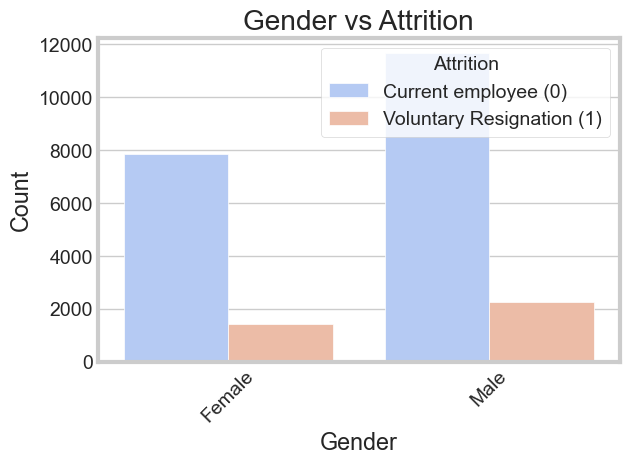

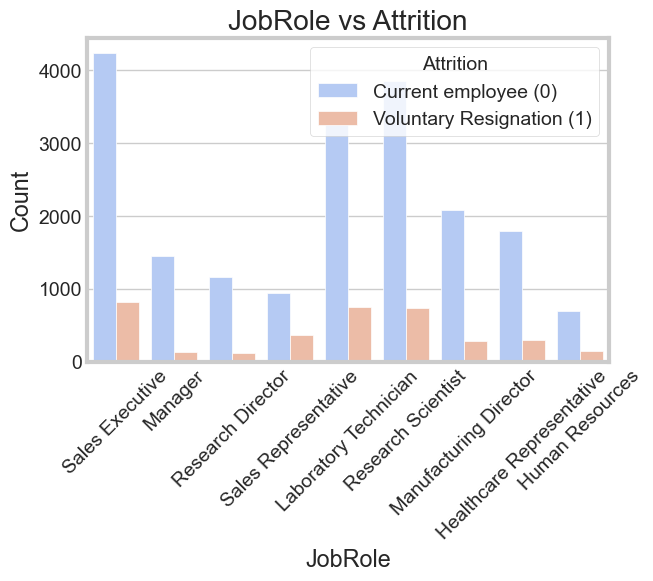

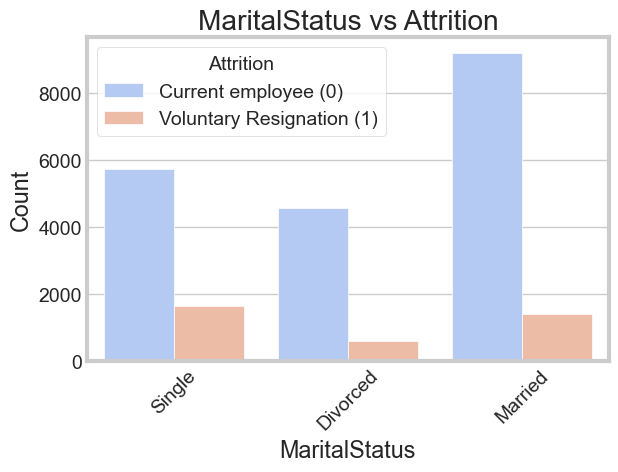

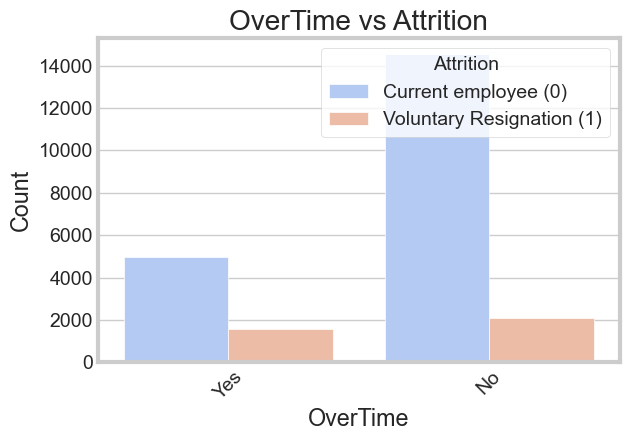

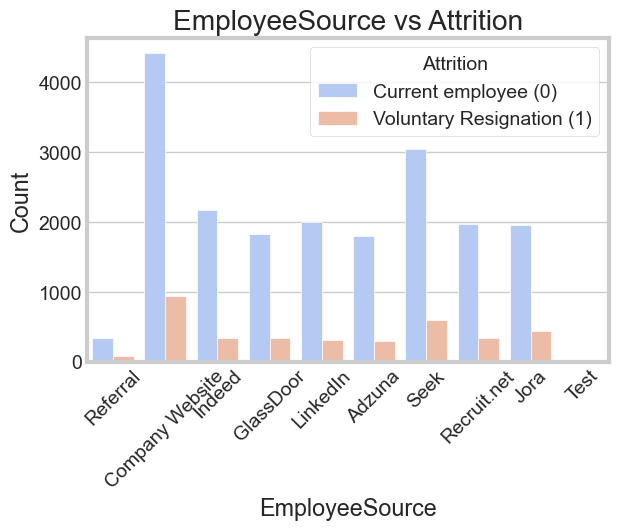

In [72]:
# Create bar plots showing the distribution of categorical features split by Attrition
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Attrition", data=df_cleaned, palette="coolwarm")
    plt.title(f"{col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Attrition", labels=["Current employee (0)", "Voluntary Resignation (1)"])
    plt.show()

In [73]:
# Cross-tabulation for selected categorical variables
cross_tab_results = {}
selected_categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'EmployeeSource']

for col in selected_categorical:
    cross_tab_results[col] = pd.crosstab(
        df_cleaned[col], df_cleaned['Attrition'], normalize='index') * 100

# Display cross-tabulations
for col, result in cross_tab_results.items():
    print(f"\nCross-tabulation of {col} vs Target:\n")
    print(result)
    print("-" * 50)



Cross-tabulation of BusinessTravel vs Target:

Attrition                  0          1
BusinessTravel                         
Non-Travel         92.109705   7.890295
Travel_Frequently  75.297075  24.702925
Travel_Rarely      85.439728  14.560272
--------------------------------------------------

Cross-tabulation of Department vs Target:

Attrition                       0          1
Department                                  
Human Resources         81.367691  18.632309
Research & Development  86.510613  13.489387
Sales                   79.676871  20.323129
--------------------------------------------------

Cross-tabulation of EducationField vs Target:

Attrition                  0          1
EducationField                         
Human Resources    82.993197  17.006803
Life Sciences      85.778474  14.221526
Marketing          82.765452  17.234548
Medical            84.880055  15.119945
Other              82.668712  17.331288
Technical Degree   77.496347  22.503653
Test         

## Multivariate Analysis

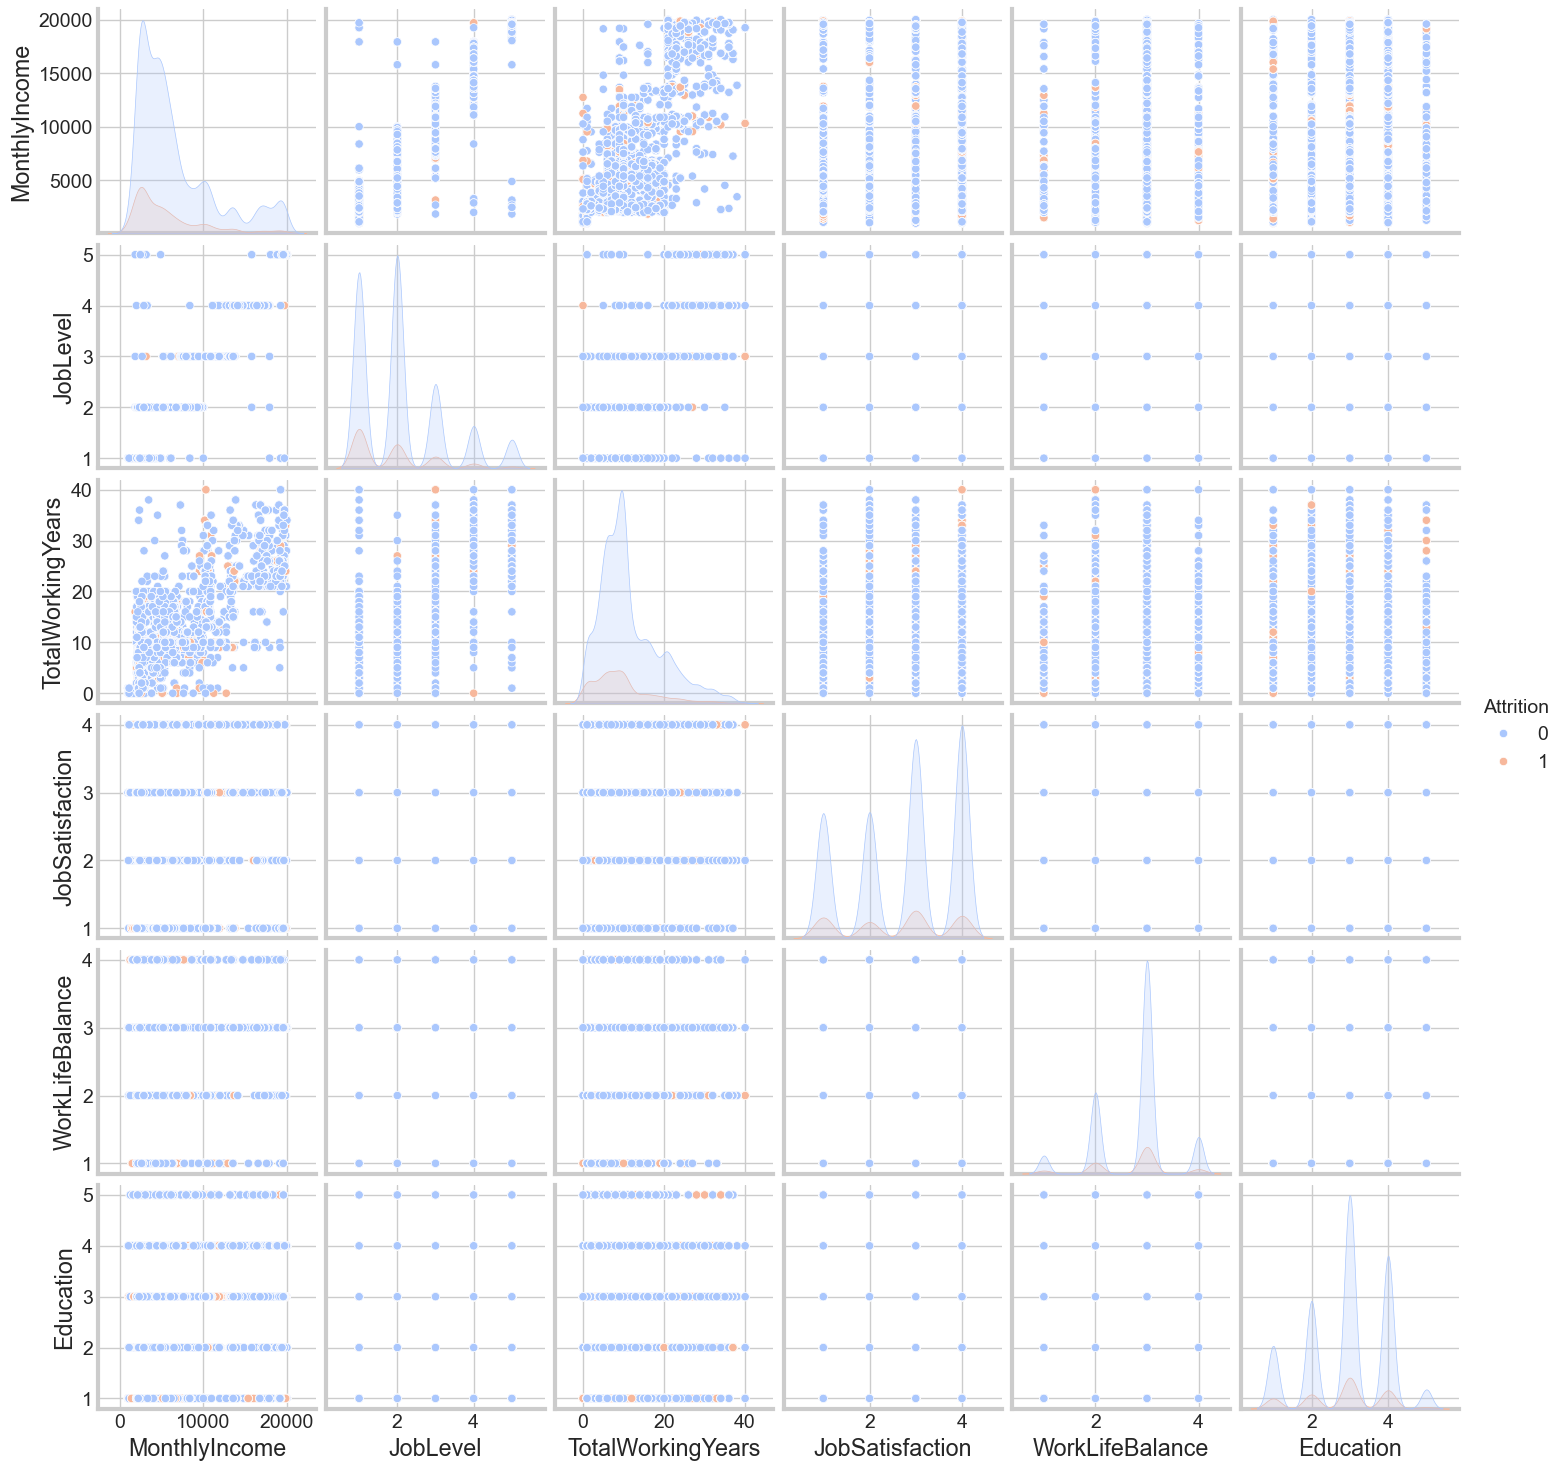

In [75]:
# Pairplot for selected features influencing attrition
selected_features = [
    "MonthlyIncome", "JobLevel", "TotalWorkingYears", "JobSatisfaction", 
    "WorkLifeBalance", "Education", "Attrition"
]
sns.pairplot(df_cleaned[selected_features], hue="Attrition", palette="coolwarm")
plt.show()

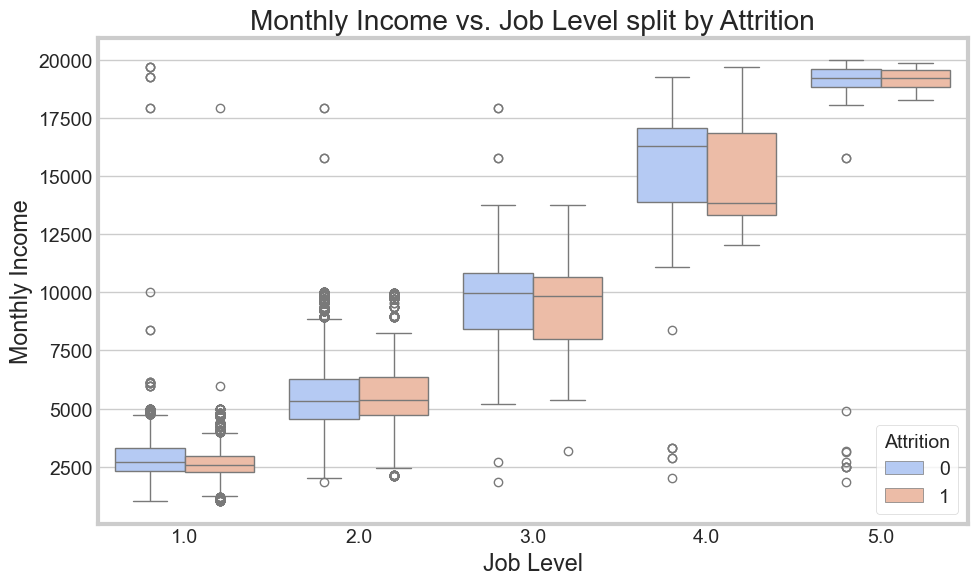

In [76]:
# Boxplot: Monthly Income vs. Job Level split by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df_cleaned, palette="coolwarm")
plt.title("Monthly Income vs. Job Level split by Attrition")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.show()

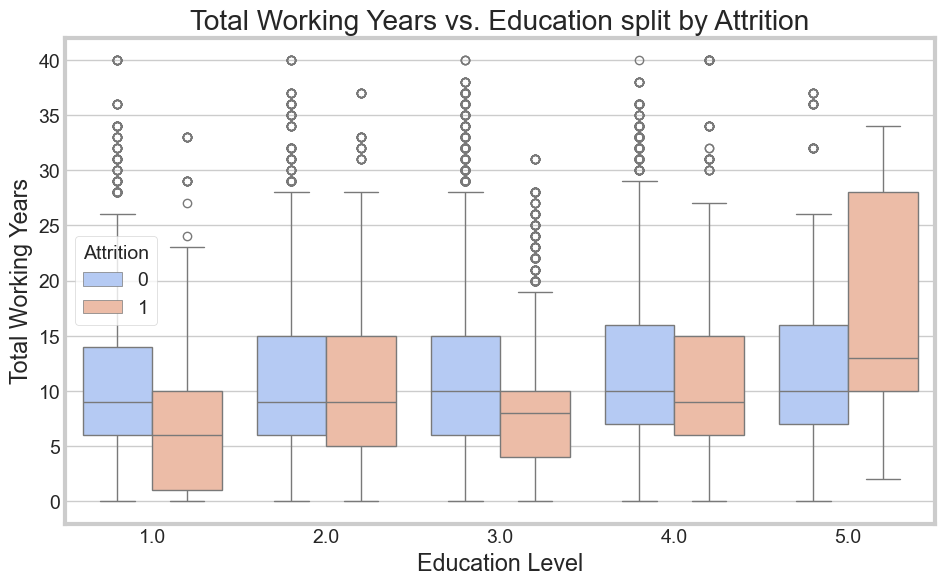

In [77]:
# Boxplot: Total Working Years vs. Education split by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", y="TotalWorkingYears", hue="Attrition", data=df_cleaned, palette="coolwarm")
plt.title("Total Working Years vs. Education split by Attrition")
plt.xlabel("Education Level")
plt.ylabel("Total Working Years")
plt.show()

## Train/Test Split

With your data prepared, split it into a train and test set.

In [79]:
# Splitting the data
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

# Doing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\n")

print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

display(X_train.head())
display(y_train.head())

# Identify numerical and categorical columns dynamically
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Define transformers for preprocessing using StandardScaler (no imputation)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Removed imputer
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown="ignore"))  # Removed imputer
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train:  (16231, 32)
y_train:  (16231,)


X_test:  (6957, 32)
y_test:  (6957,)


Age     BusinessTravel  DailyRate              Department  \
21274  42.0      Travel_Rarely      647.0                   Sales   
9592   29.0      Travel_Rarely      726.0  Research & Development   
14796  35.0      Travel_Rarely     1219.0                   Sales   
22448  43.0  Travel_Frequently      775.0                   Sales   
180    41.0      Travel_Rarely      802.0                   Sales   

       DistanceFromHome  Education    EducationField  ApplicationID  \
21274                 4        4.0     Life Sciences         136917   
9592                 29        1.0  Technical Degree         132698   
14796                18        3.0           Medical         134667   
22448                15        3.0           Medical         127519   
180                   9        1.0           Medical         125684   

       EnvironmentSatisfaction  Gender  ...  RelationshipSatisfaction  \
21274                      2.0    Male  ...                       4.0   
9592                       3.0  Female  ...                       2.0   
14796                      3.0  Female  ...                       2.0   
22448                      1.0  Female  ...                       1.0   
180                        3.0    Male  ...                       3.0   

       StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
21274               0.0                9.0                   3.0   
9592                2.0                9.0                   4.0   
14796               0.0                5.0                   3.0   
22448               1.0               17.0                   2.0   
180                 1.0               12.0                   2.0   

       WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
21274              4.0            6.0                 4.0   
9592               3.0            5.0                 3.0   
14796              3.0            5.0                 2.0   
22448              2.0            3.0                 1.0   
180                3.0            9.0                 7.0   

       YearsSinceLastPromotion  YearsWithCurrManager   EmployeeSource  
21274                      1.0                   5.0             Seek  
9592                       1.0                   4.0  Company Website  
14796                      1.0                   0.0             Jora  
22448                      0.0                   2.0             Jora  
180                        0.0                   7.0             Seek  

[5 rows x 32 columns]

21274    0
9592     0
14796    0
22448    0
180      0
Name: Attrition, dtype: int64

## A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [81]:
baseline = df_cleaned['Attrition'].value_counts(normalize = True)[0]
print(baseline)

0.84207348628601


Baseline Model Accuracy: 0.8422
Baseline Model Precision: 0.0000
Baseline Model Recall: 0.0000
Baseline Model F1 Score: 0.0000
ROC-AUC Score: 0.5000


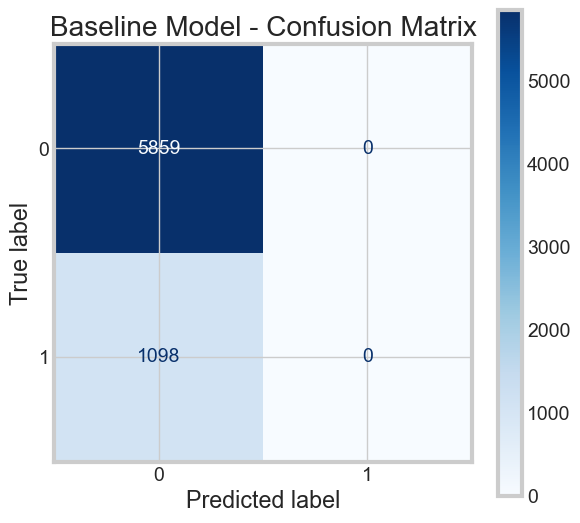


Baseline Model - Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5859
           1       0.00      0.00      0.00      1098

    accuracy                           0.84      6957
   macro avg       0.42      0.50      0.46      6957
weighted avg       0.71      0.84      0.77      6957



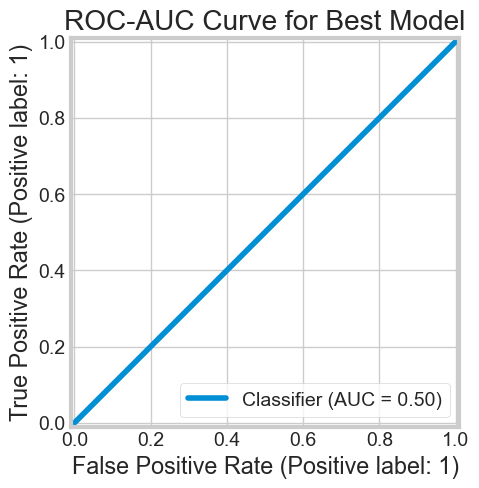


Results DataFrame:


model  train accuracy  test accuracy  precision  recall  F1 score  \
0  Baseline model        0.842031       0.842173        0.0     0.0       0.0   

   train time (s)  ROC-AUC Best Params  
0        0.002309      0.5           -

In [82]:
# Create a baseline model using DummyClassifier
baseline_model = DummyClassifier(strategy="most_frequent")  # Always predicts the most common class

# Measure training time
start_time = time.time()
baseline_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions
y_baseline_pred = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Evaluate baseline performance
baseline_accuracy = accuracy_score(y_test, y_baseline_pred)
baseline_precision = precision_score(y_test, y_baseline_pred, zero_division=0)
baseline_recall = recall_score(y_test, y_baseline_pred, zero_division=0)
baseline_f1 = f1_score(y_test, y_baseline_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print all evaluation metrics
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Model Precision: {baseline_precision:.4f}")
print(f"Baseline Model Recall: {baseline_recall:.4f}")
print(f"Baseline Model F1 Score: {baseline_f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Generate and display confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_baseline_pred)
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 6))
disp_baseline.plot(cmap="Blues", ax=ax, colorbar=True)
plt.title("Baseline Model - Confusion Matrix")
plt.show()

# Print classification report for baseline model
print("\nBaseline Model - Classification Report:\n")
print(classification_report(y_test, y_baseline_pred))

# Plot ROC-AUC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC-AUC Curve for Best Model")
plt.show()

# Create a new DataFrame with specified columns including precision, recall, and F1
results_df = pd.DataFrame(columns=[
    'model', 'train accuracy', 'test accuracy', 'precision', 'recall', 'F1 score', 'train time (s)', 'ROC-AUC', 'Best Params'
])

# Append baseline model results
current_results = pd.DataFrame([[
    'Baseline model',
    baseline_model.score(X_train, y_train),
    baseline_model.score(X_test, y_test),
    baseline_precision,
    baseline_recall,
    baseline_f1,
    train_time,
    roc_auc,
    '-'
]], columns=[
    'model', 'train accuracy', 'test accuracy', 'precision', 'recall', 'F1 score', 'train time (s)', 'ROC-AUC', 'Best Params'
])

results_df = pd.concat([results_df, current_results], ignore_index=True)

# Display the results DataFrame
print("\nResults DataFrame:")
results_df

## A Simple Model


Training KNN...


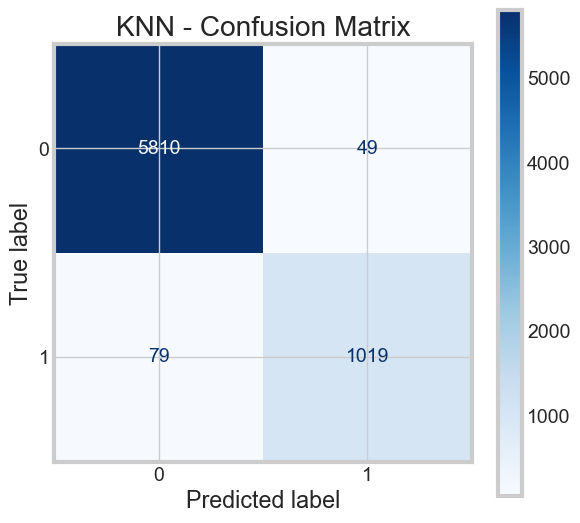


Classification Report for KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5859
           1       0.95      0.93      0.94      1098

    accuracy                           0.98      6957
   macro avg       0.97      0.96      0.97      6957
weighted avg       0.98      0.98      0.98      6957

Accuracy: 0.9816
Precision: 0.9541
Recall: 0.9281
F1 Score: 0.9409
ROC-AUC Score: 0.9941


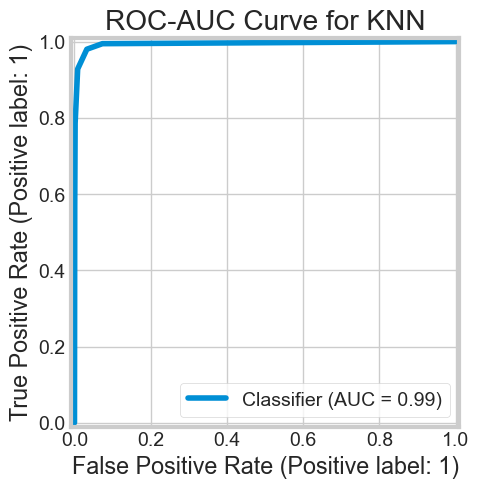


Training Logistic Regression...


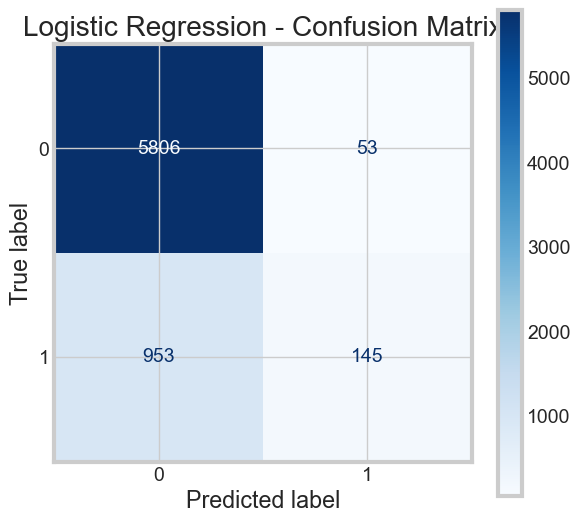


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5859
           1       0.73      0.13      0.22      1098

    accuracy                           0.86      6957
   macro avg       0.80      0.56      0.57      6957
weighted avg       0.84      0.86      0.81      6957

Accuracy: 0.8554
Precision: 0.7323
Recall: 0.1321
F1 Score: 0.2238
ROC-AUC Score: 0.7422


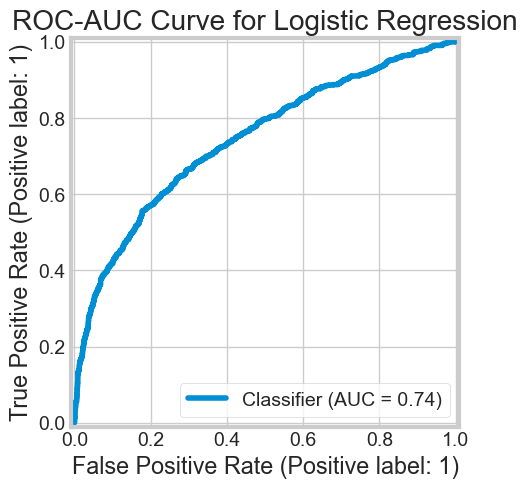


Training Decision Tree...


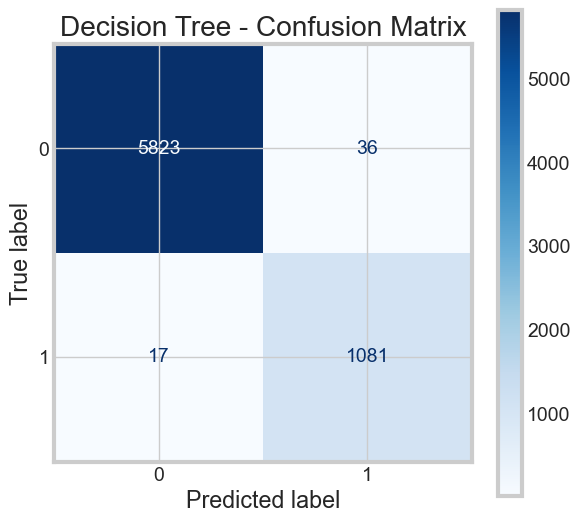


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5859
           1       0.97      0.98      0.98      1098

    accuracy                           0.99      6957
   macro avg       0.98      0.99      0.99      6957
weighted avg       0.99      0.99      0.99      6957

Accuracy: 0.9924
Precision: 0.9678
Recall: 0.9845
F1 Score: 0.9761
ROC-AUC Score: 0.9892


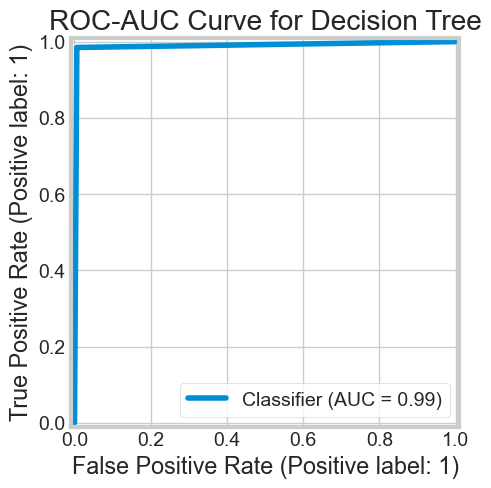


Training SVM...


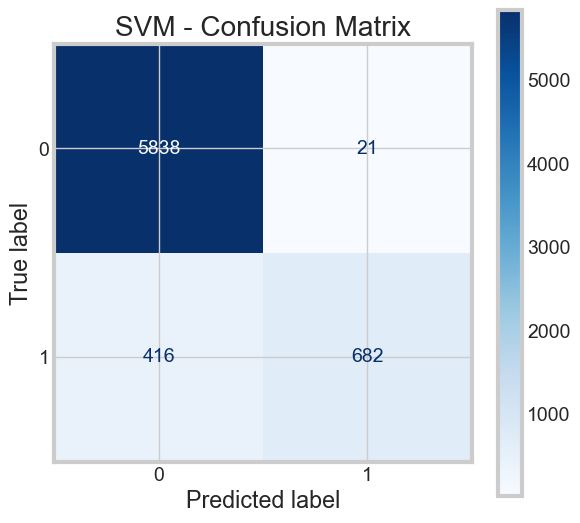


Classification Report for SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5859
           1       0.97      0.62      0.76      1098

    accuracy                           0.94      6957
   macro avg       0.95      0.81      0.86      6957
weighted avg       0.94      0.94      0.93      6957

Accuracy: 0.9372
Precision: 0.9701
Recall: 0.6211
F1 Score: 0.7574
ROC-AUC Score: 0.9737


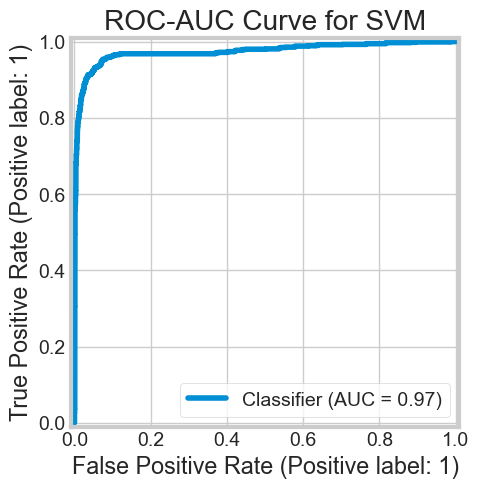


Training Random Forest...


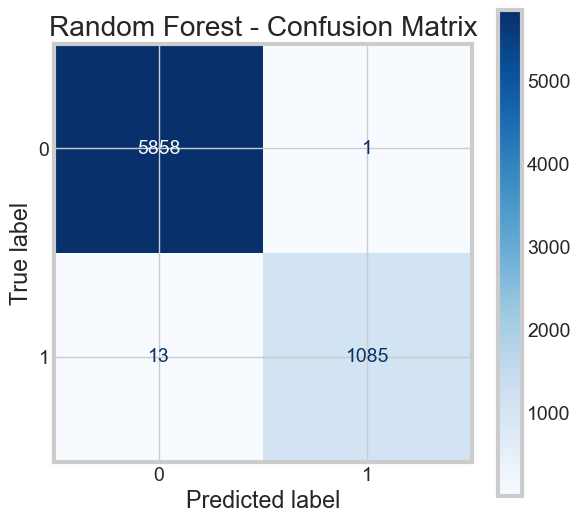


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5859
           1       1.00      0.99      0.99      1098

    accuracy                           1.00      6957
   macro avg       1.00      0.99      1.00      6957
weighted avg       1.00      1.00      1.00      6957

Accuracy: 0.9980
Precision: 0.9991
Recall: 0.9882
F1 Score: 0.9936
ROC-AUC Score: 0.9999


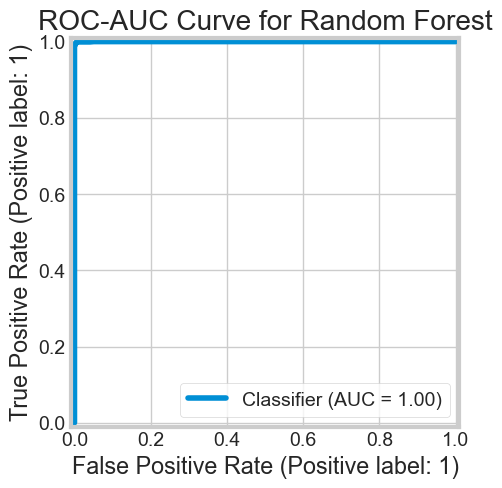


Training AdaBoost...


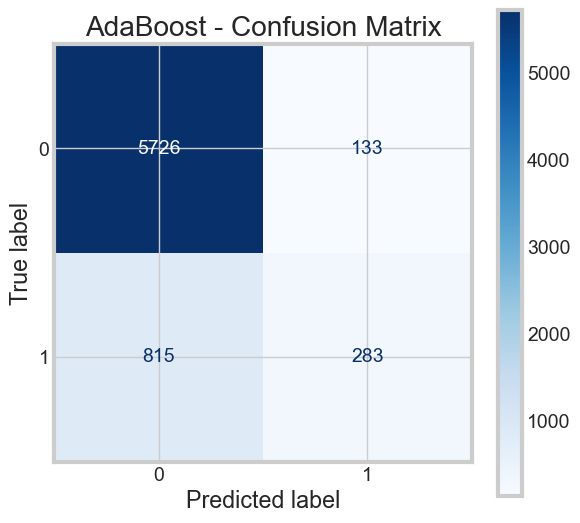


Classification Report for AdaBoost
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5859
           1       0.68      0.26      0.37      1098

    accuracy                           0.86      6957
   macro avg       0.78      0.62      0.65      6957
weighted avg       0.84      0.86      0.84      6957

Accuracy: 0.8637
Precision: 0.6803
Recall: 0.2577
F1 Score: 0.3738
ROC-AUC Score: 0.8308


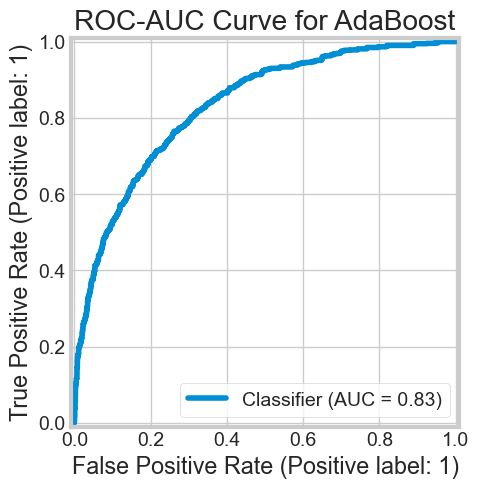


Final Model Comparison:
                 model  train accuracy  test accuracy  precision    recall  \
0                  KNN        0.991991       0.981601   0.954120  0.928051   
1  Logistic Regression        0.851211       0.855397   0.732323  0.132058   
2        Decision Tree        1.000000       0.992382   0.967771  0.984517   
3                  SVM        0.953977       0.937186   0.970128  0.621129   
4        Random Forest        1.000000       0.997988   0.999079  0.988160   
5             AdaBoost        0.863163       0.863734   0.680288  0.257741   

   F1 score  train time (s)   ROC-AUC  
0  0.940905        0.066945  0.994072  
1  0.223765        0.134887  0.742225  
2  0.976072        0.305211  0.989186  
3  0.757357       74.642723  0.973724  
4  0.993590        2.778523  0.999933  
5  0.373844        3.523924  0.830764  


In [84]:

# Define Models with AdaBoost
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),  # Enable probability for ROC-AUC
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Initialize results DataFrame
results_df = pd.DataFrame(columns=[
    'model', 'train accuracy', 'test accuracy', 'precision', 'recall', 'F1 score', 'train time (s)', 'ROC-AUC'
])

# Loop through each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Define pipeline
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Train model
    start_train_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_train_time

    # Make predictions
    y_pred = pipe.predict(X_test)
    y_pred_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp_numeric = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Display confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    disp_numeric.plot(cmap="Blues", ax=ax, colorbar=True)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    print("\nClassification Report for", model_name)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC-AUC Curve
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
    plt.title(f"ROC-AUC Curve for {model_name}")
    plt.show()

    # Store results
    current_results = pd.DataFrame([[
        model_name,
        pipe.score(X_train, y_train),
        accuracy,
        precision,
        recall,
        f1,
        train_time,
        roc_auc
    ]], columns=[
        'model', 'train accuracy', 'test accuracy', 'precision', 'recall', 'F1 score', 'train time (s)', 'ROC-AUC'
    ])

    results_df = pd.concat([results_df, current_results], ignore_index=True)

# Display results DataFrame
print("\nFinal Model Comparison:")
print(results_df)


## Cross validation 


Training KNN...
Accuracy: 0.9816, Precision: 0.9541, Recall: 0.9281, F1 Score: 0.9409, ROC-AUC: 0.9941
Cross-Validation Mean Accuracy: 0.9611, Std Dev: 0.0027


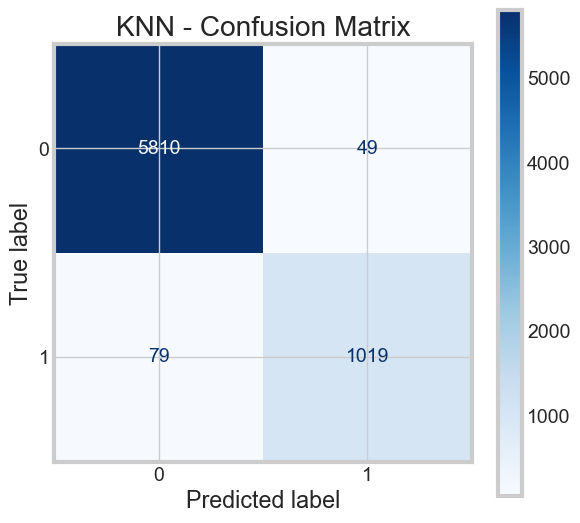

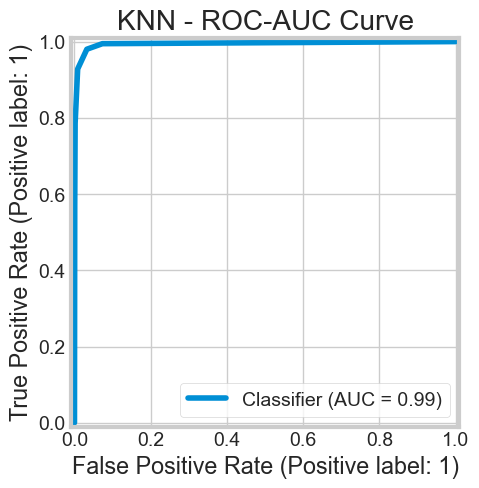


Training Logistic Regression...
Accuracy: 0.8554, Precision: 0.7323, Recall: 0.1321, F1 Score: 0.2238, ROC-AUC: 0.7422
Cross-Validation Mean Accuracy: 0.8499, Std Dev: 0.0017


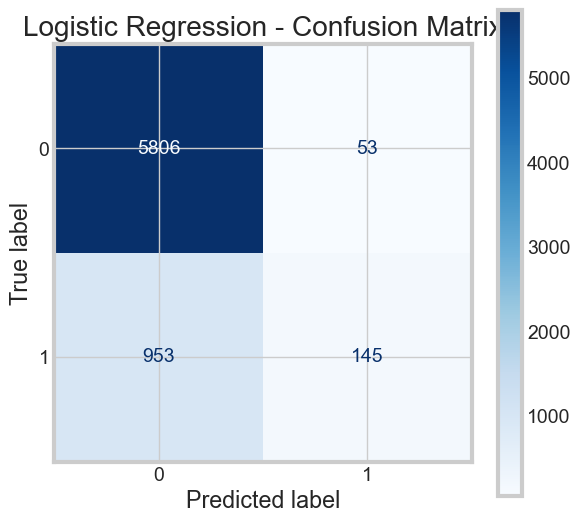

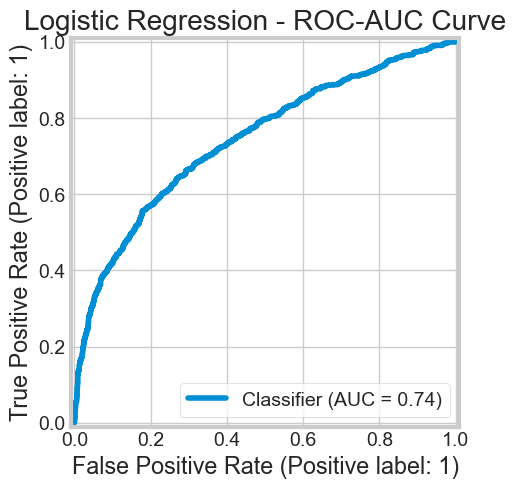


Training Decision Tree...
Accuracy: 0.9194, Precision: 0.8510, Recall: 0.5929, F1 Score: 0.6989, ROC-AUC: 0.9057
Cross-Validation Mean Accuracy: 0.9258, Std Dev: 0.0055


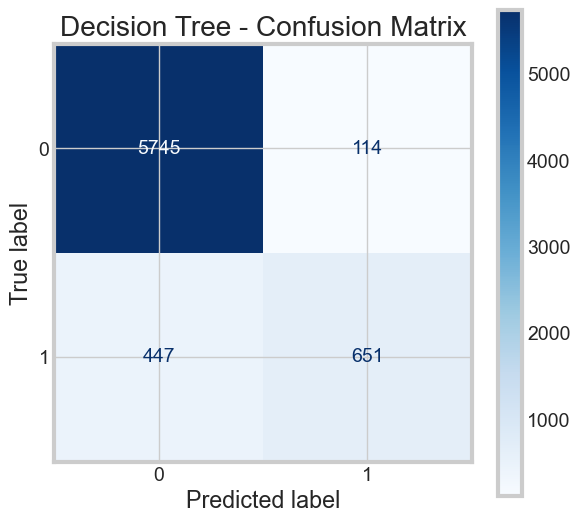

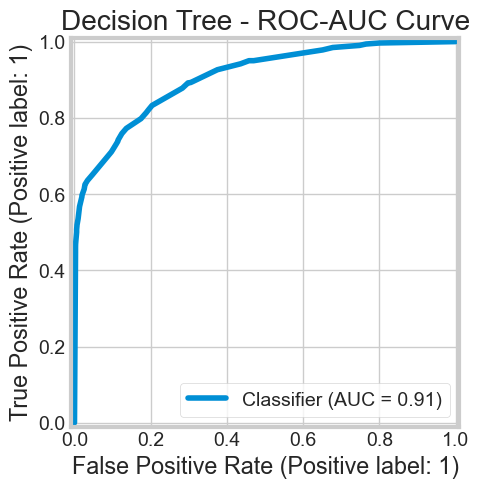


Training SVM...
Accuracy: 0.8422, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, ROC-AUC: 0.6022
Cross-Validation Mean Accuracy: 0.8420, Std Dev: 0.0001


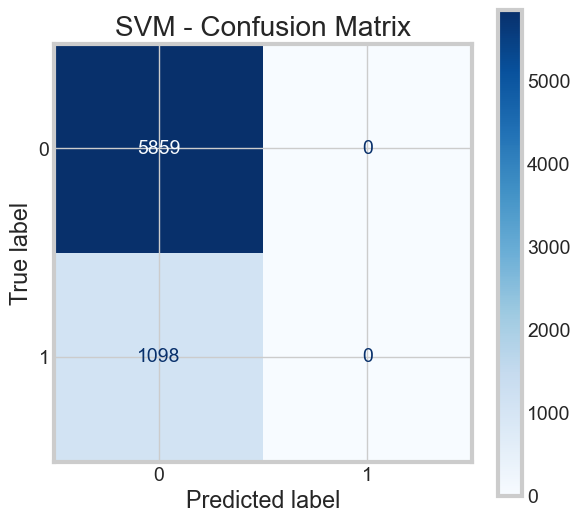

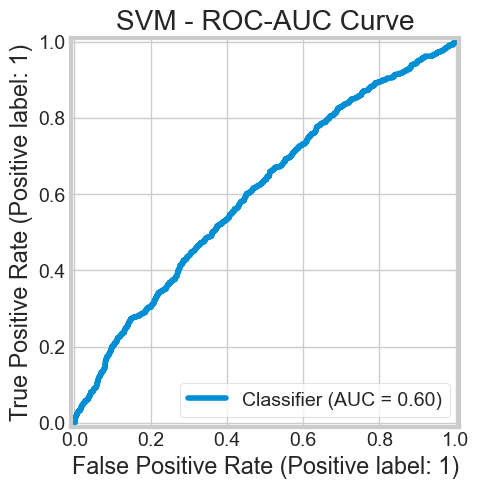


Training Random Forest...
Accuracy: 0.9182, Precision: 1.0000, Recall: 0.4818, F1 Score: 0.6503, ROC-AUC: 0.9926
Cross-Validation Mean Accuracy: 0.9149, Std Dev: 0.0013


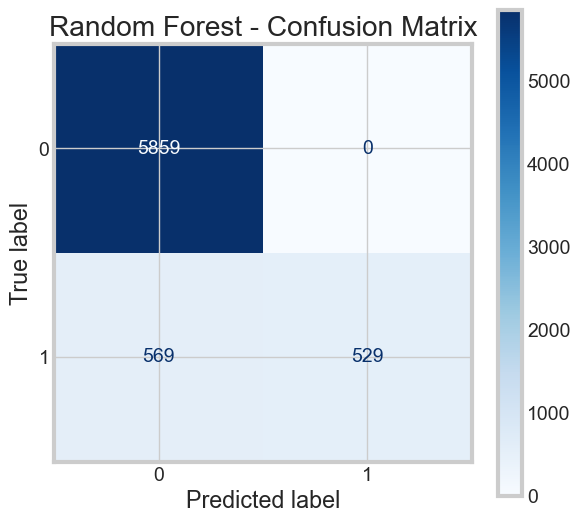

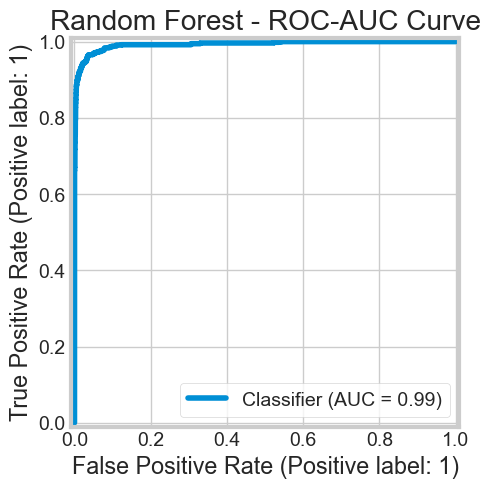


Training AdaBoost...
Accuracy: 0.8637, Precision: 0.6803, Recall: 0.2577, F1 Score: 0.3738, ROC-AUC: 0.8308
Cross-Validation Mean Accuracy: 0.8583, Std Dev: 0.0045


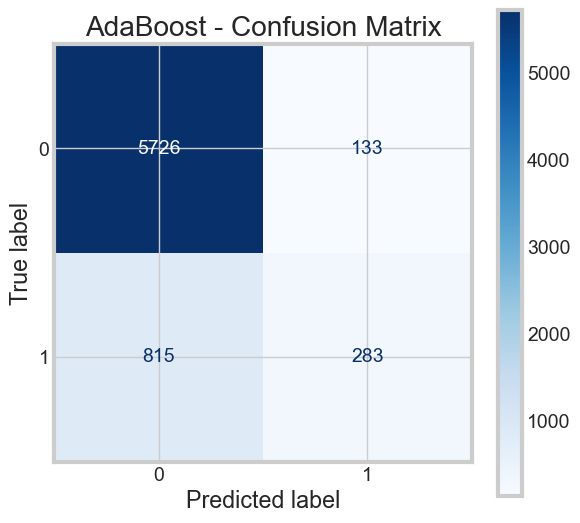

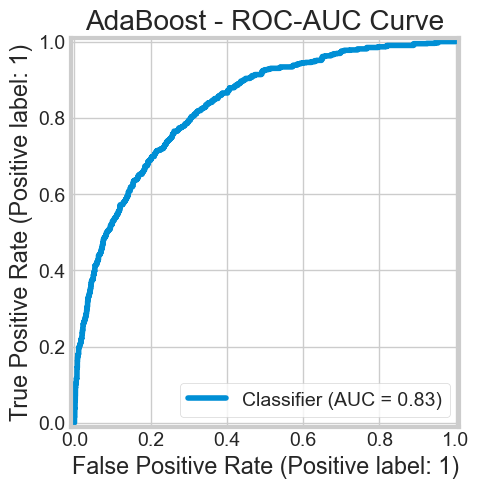

Train Accuracy  Test Accuracy  Precision    Recall  \
KNN                        0.991991       0.981601   0.954120  0.928051   
Logistic Regression        0.851211       0.855397   0.732323  0.132058   
Decision Tree              0.933645       0.919362   0.850980  0.592896   
SVM                        0.842092       0.842173   0.000000  0.000000   
Random Forest              0.931612       0.918212   1.000000  0.481785   
AdaBoost                   0.863163       0.863734   0.680288  0.257741   

                     F1 Score  Train Time (s)   ROC-AUC  \
KNN                  0.940905        0.128372  0.994072   
Logistic Regression  0.223765        0.134717  0.742225   
Decision Tree        0.698873        0.293193  0.905709   
SVM                  0.000000      137.391956  0.602239   
Random Forest        0.650277        1.852202  0.992622   
AdaBoost             0.373844        3.579669  0.830764   

                     Cross-Validation Accuracy (mean)  \
KNN                                          0.961124   
Logistic Regression                          0.849917   
Decision Tree                                0.925760   
SVM                                          0.842031   
Random Forest                                0.914854   
AdaBoost                                     0.858296   

                     Cross-Validation Accuracy (std)  
KNN                                         0.002696  
Logistic Regression                         0.001677  
Decision Tree                               0.005485  
SVM                                         0.000120  
Random Forest                               0.001346  
AdaBoost                                    0.004461

In [86]:
# Define Models with AdaBoost and XGBoost
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    #"XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Results Storage
results = {}

# Train and Evaluate Each Model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        (model_name.lower().replace(" ", "_"), model)
    ])

    # Cross-validation accuracy
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else y_pred

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

    # Store Results in Dictionary
    results[model_name] = {
        'Train Accuracy': pipeline.score(X_train, y_train),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Train Time (s)': train_time,
        'ROC-AUC': roc_auc,
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap="Blues", ax=ax, colorbar=True)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
    plt.title(f"{model_name} - ROC-AUC Curve")
    plt.show()

# Convert results dictionary to DataFrame for better display
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df


## Cross validation - focus on F1


Training KNN...
Train Accuracy: 0.9920, Test Accuracy: 0.9816
F1 Score: 0.9409, Precision: 0.9541, Recall: 0.9281, ROC-AUC: 0.9941
Cross-Validation Mean F1 Score: 0.8729, Std Dev: 0.0110


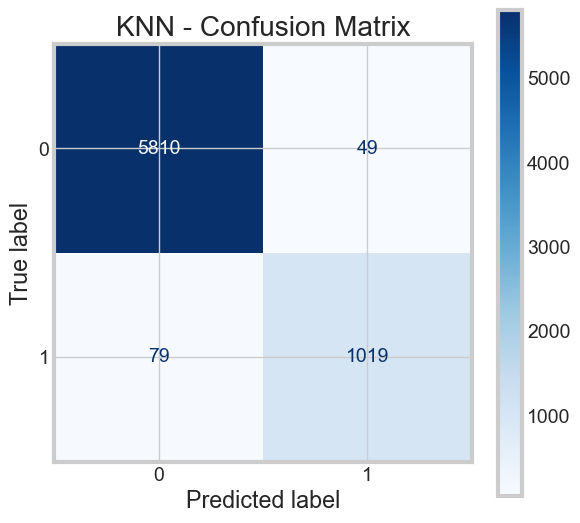

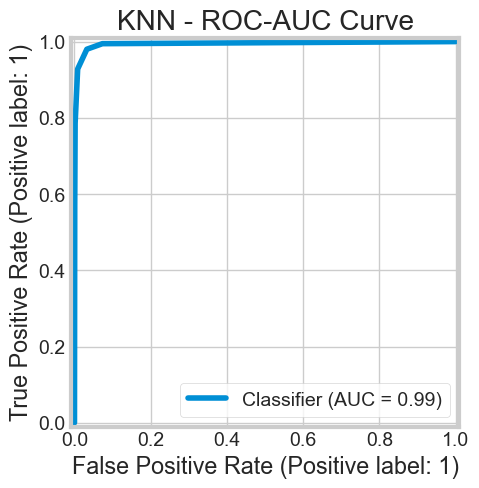


Training Logistic Regression...
Train Accuracy: 0.8512, Test Accuracy: 0.8554
F1 Score: 0.2238, Precision: 0.7323, Recall: 0.1321, ROC-AUC: 0.7422
Cross-Validation Mean F1 Score: 0.2081, Std Dev: 0.0095


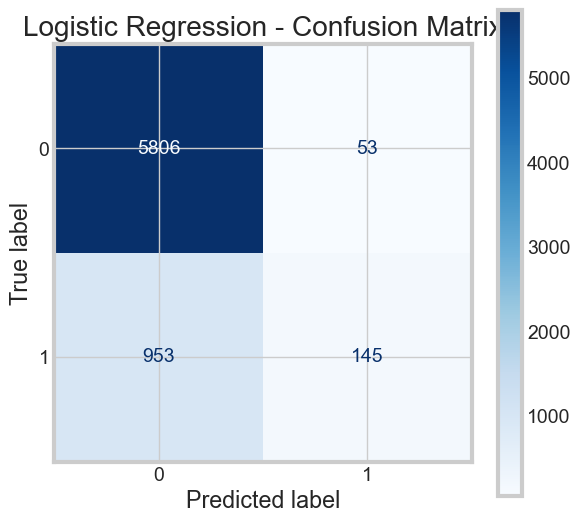

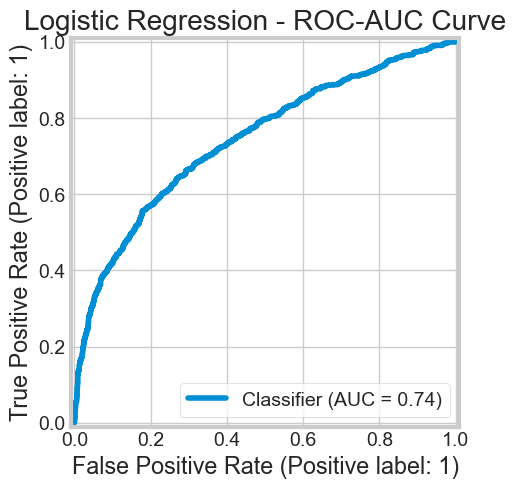


Training Decision Tree...
Train Accuracy: 0.9336, Test Accuracy: 0.9194
F1 Score: 0.6989, Precision: 0.8510, Recall: 0.5929, ROC-AUC: 0.9057
Cross-Validation Mean F1 Score: 0.7160, Std Dev: 0.0234


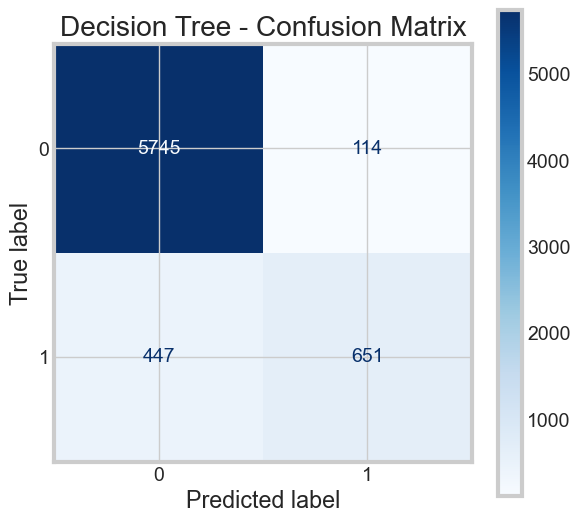

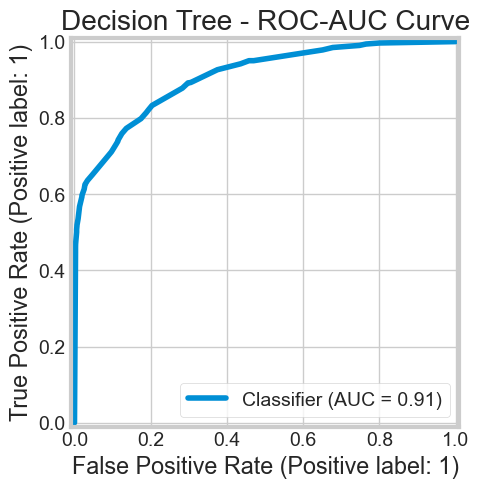


Training SVM...
Train Accuracy: 0.8421, Test Accuracy: 0.8422
F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.6022
Cross-Validation Mean F1 Score: 0.0000, Std Dev: 0.0000


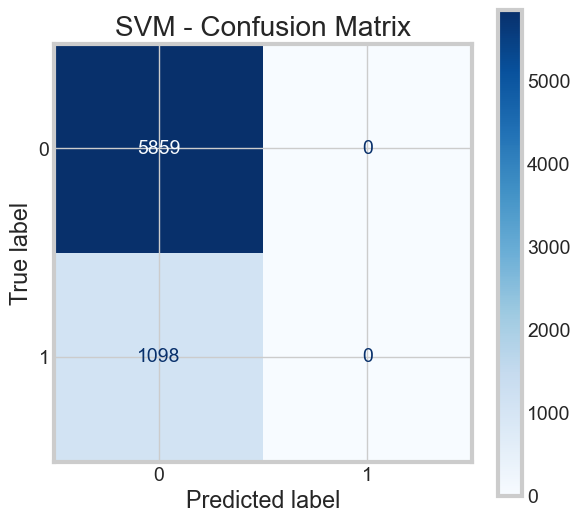

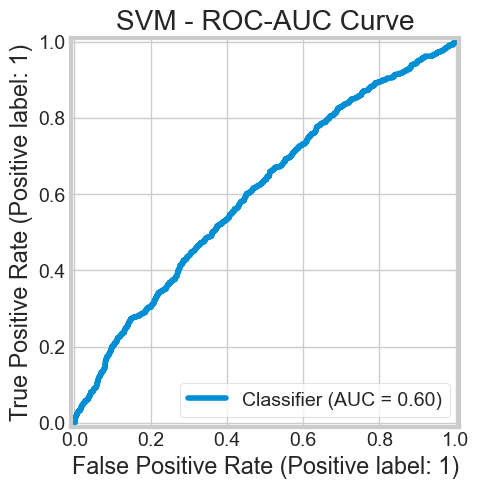


Training Random Forest...
Train Accuracy: 0.9316, Test Accuracy: 0.9182
F1 Score: 0.6503, Precision: 1.0000, Recall: 0.4818, ROC-AUC: 0.9926
Cross-Validation Mean F1 Score: 0.6314, Std Dev: 0.0077


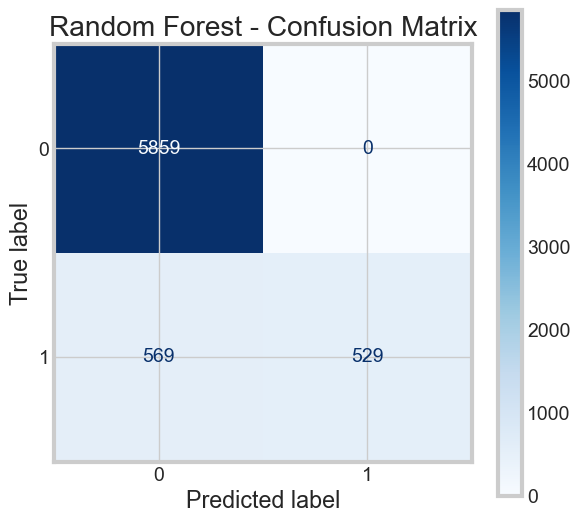

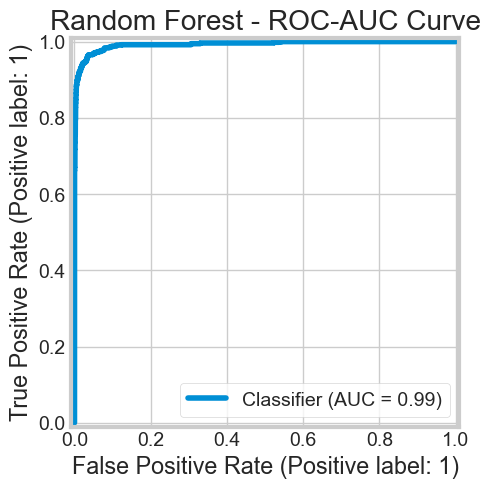


Training AdaBoost...
Train Accuracy: 0.8632, Test Accuracy: 0.8637
F1 Score: 0.3738, Precision: 0.6803, Recall: 0.2577, ROC-AUC: 0.8308
Cross-Validation Mean F1 Score: 0.3428, Std Dev: 0.0206


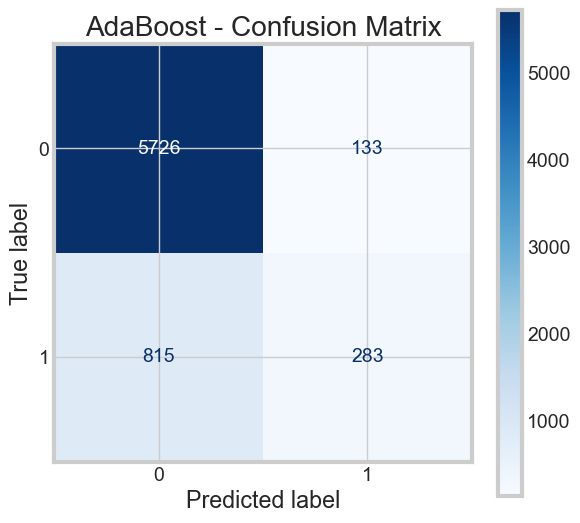

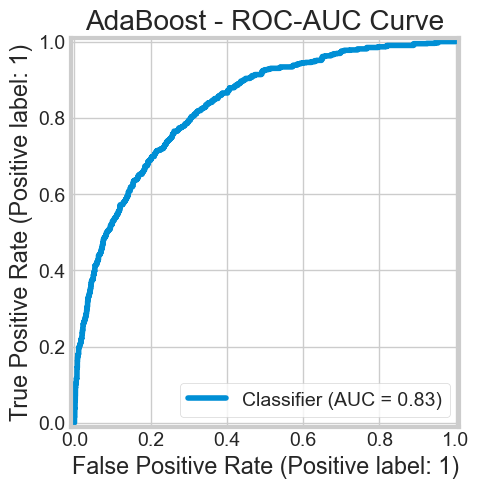

Train Accuracy  Test Accuracy  F1 Score  Precision  \
KNN                        0.991991       0.981601  0.940905   0.954120   
Logistic Regression        0.851211       0.855397  0.223765   0.732323   
Decision Tree              0.933645       0.919362  0.698873   0.850980   
SVM                        0.842092       0.842173  0.000000   0.000000   
Random Forest              0.931612       0.918212  0.650277   1.000000   
AdaBoost                   0.863163       0.863734  0.373844   0.680288   

                       Recall  Train Time (s)   ROC-AUC  \
KNN                  0.928051        0.083367  0.994072   
Logistic Regression  0.132058        0.126710  0.742225   
Decision Tree        0.592896        0.236597  0.905709   
SVM                  0.000000      132.334561  0.602239   
Random Forest        0.481785        1.837889  0.992622   
AdaBoost             0.257741        3.646765  0.830764   

                     Cross-Validation F1 Score (mean)  \
KNN                                          0.872873   
Logistic Regression                          0.208054   
Decision Tree                                0.716000   
SVM                                          0.000000   
Random Forest                                0.631427   
AdaBoost                                     0.342818   

                     Cross-Validation F1 Score (std)  
KNN                                         0.010994  
Logistic Regression                         0.009451  
Decision Tree                               0.023390  
SVM                                         0.000000  
Random Forest                               0.007691  
AdaBoost                                    0.020607

In [88]:
# Define Models with AdaBoost and XGBoost
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
   # "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Results Storage
results = {}

# Train and Evaluate Each Model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Cross-validation F1-score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)

    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else y_pred

    # Metrics
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-Validation Mean F1 Score: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

    # Store Results in Dictionary
    results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Train Time (s)': train_time,
        'ROC-AUC': roc_auc,
        'Cross-Validation F1 Score (mean)': cv_scores.mean(),
        'Cross-Validation F1 Score (std)': cv_scores.std(),
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap="Blues", ax=ax, colorbar=True)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
    plt.title(f"{model_name} - ROC-AUC Curve")
    plt.show()

# Convert results dictionary to DataFrame for better display
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df


## Grid Search and cross validation, feature importance

## Best Model